<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [38]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

# Introduction: Home Credit Default Risk Kaggle Competition

__[Home Credit](https://www.homecredit.ph/)__ is an international non-bank financial institution which focuses primarily on lending to people with little or no credit history. Those with limited credit histories can often struggle to secure loans and can be subject to predatory lenders. Home Credit wants to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. To achieve this goal Home Credit makes use of a variety of alternative data to predict clients' repayment abilities.

Home Credit is now turning to kaggle to use historical loan application data to predict whether or not an applicant will be able to repay a loan.

Further information about this competition can be found on __[kaggle](https://www.kaggle.com/c/home-credit-default-risk)__.

### Table of Contents:

1. [Data](#Data)


2. [Problem](#Problem)


3. [Loading Data](#Load)


4. [Glimpse of the Data](#Glimpse)
   
   
5. [Missing Values](#MissVals)


6. [Exploring the Data](#EDA)


7. [Target](#Target)
    
        
8. [Columns](#Columns)
    

9. [Loan Information](#LoanInfo)

    9.1 [Loan Type](#LoanType)
    
    9.2 [Credit Amount](#CreditAmount)
    
    9.3 [Loan Annuity](#LoanAnn)
    
    9.4 [Price of Item](#PriceItem)
    
    
10. [Income Information](#IncomeInfo)

    10.1 [Income Type](#IncomeType)
    
    10.2 [Occupation Type](#OccupType)
    
    10.3 [Organization Type](#Organ)
    
    10.4 [Income Amount](#IncomeTotal)
    
    10.5 [Length of Employment](#EmployLength)


11. [Who is our Applicant?](#Who)

    11.1 [Education](#Education)
    
    11.2 [Age](#Age)

    11.3 [Gender](#Gender)


12. [Family of Applicant](#Family)
    
    12.1 [Status](#FamilyStatus)

    12.2 [Size](#CountFamily)

    12.3 [Children](#Children)


13. [Housing](#Housing)

    13.1 [Owner of Realty](#Realty)
    
    13.2 [Housing Situation](#HousingSit)
    
    13.3 [Region](#Region)
    
    -  13.3.1 [Region Population](#RegionPop)
    
    -  13.3.2 [Region Rating](#RegionRating)
    
    13.4 [About the House](#DetailsHouse)
   
   
14. [Car](#Car)

    14.1 [Owner of Car](#OwnCar)
    
    14.2 [Age of Car](#AgeCar)
    
    
15. [Credit Rating](#CreditRating)


16. [Social Surrounding](#Social)


17. [Enquiries to Credit Burea](#EnqBureau)
    
    
18. [Documents Provided](#Documents)


19. [Time of Application](#Application)

    19.1 [Accompanied By](#Accompanied)

    19.2 [When did the applicant apply?](#TimeApp)
    
    19.3 [Change of Information](#ChangeInfo)


20. [Contact Information](#ContactInfo)

***

21. [Previous Applications Data Frame](#PrevApp)

    21.1 [How is this related to our sample?](#Relation)
    
    21.2 [Contract Status](#ContractStatus)
    
    21.3 [Loan Type](#PrevLoanType)
    
    21.4 [Amount Values](#AmountValues)
    
    21.5 [Rates](#Rates)
    
    21.6 [Why does the applicant need the loan?](#Why)
    
    21.7 [What was the reason for rejection?](#Reject)
    
    
22. [Summary](#summary)


    
    

***

# 1. Data <a name="Data"></a>

There are 7 provided files:

- application_train/application_test: The main training and test sets with information about each loan application at Home Credit. One row represents one loan.

- bureau: All of the client's previous credits provided by other financial institutions that were reported to Credit Bureau. Each previous credit has its own row in bureau, but one loan application data can have multiple previous credits.

- bureau_balance: Monthly data of previous credits in Credit Bureau. Each row is one month of a previous credit.

- previous_application: All previous applications for Home Credit loans of clients who have loans in our sample. There is one row for each previous application related to loans in our data sample.

- POS_CASH_balance: Monthly data about previous point of sale or cash loans that clients had with Home Credit. Table has 1 row for each month of history of every previous credit.

- credit_card_balance: Monthly balance of previous credit cards that the applicant has with Home Credit. 

- installments_payments: Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample. There is 1 row for each payment made and 1 row for each missed payment. One row is one installment. 

All of these files are available on __[kaggle](https://www.kaggle.com/c/home-credit-default-risk)__.

They have also provided a diagram to illustrate how all of the data is related:

![](home_credit.png)


# 2. Problem <a name="Problem"></a>

This is a standard supervised binary classification problem. We have labelled data in our training set and we want to classify our test set. The two classes which we are trying to classify are:

__Class 0__: The borrower did not default on the loan. (repaid the loan)

__Class 1__: The borrower defaulted on the loan. (failed to repay loan)

Default: the failure to meet the conditions of a loan. 

The metric by which submissions are judged is __[Area Under Reciever Operating Characteristic (AUROC)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)__. This is a relatively straightforward metric as it graphs the true positive rate vs. the false positive rate and calculates the area under that curve.

# 3. Loading Data <a name="Load"></a>

In [3]:
# imported libraries
import numpy as np
import pandas as pd
import sklearn.preprocessing as LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from scipy import stats

In [4]:
# loading the data, this takes about ~ minutes on my machine
application_train = pd.read_csv("application_train.csv")
application_test = pd.read_csv("application_test.csv")
bureau_balance = pd.read_csv("bureau_balance.csv")
bureau = pd.read_csv("bureau.csv")
credit_card_balance = pd.read_csv("credit_card_balance.csv")
installments_payments = pd.read_csv("installments_payments.csv")
POS_CASH_balance = pd.read_csv("POS_CASH_balance.csv")
previous_application = pd.read_csv("previous_application.csv")

In [5]:
print('Size of application_train data', application_train.shape)
print('Size of application_test data', application_test.shape)
print('Size of bureau_balance data', bureau_balance.shape)
print('Size of bureau data', bureau.shape)
print('Size of credit_card_balance data', credit_card_balance.shape)
print('Size of installments_payments data', installments_payments.shape)
print('Size of POS_CASH_balance data', POS_CASH_balance.shape)
print('Size of previous_application data', previous_application.shape)

Size of application_train data (307511, 122)
Size of application_test data (48744, 121)
Size of bureau_balance data (27299925, 3)
Size of bureau data (1716428, 17)
Size of credit_card_balance data (3840312, 23)
Size of installments_payments data (13605401, 8)
Size of POS_CASH_balance data (10001358, 8)
Size of previous_application data (1670214, 37)


__Conclusion__: The training set is much larger than the testing set. This bodes well for us since it'll limit the need to find features through unsupervised learning methods. However a thorough exploration of the test and train set are still needed to determine how congruent each set is to each other.

# 4. Glimpse of the Data <a name="Glimpse"></a>

__application_train data__

In [7]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


__bureau_balance data__

In [245]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


__bureau data__

In [6]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


__credit_card_balance data__

In [7]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


__installments_payments data__

In [8]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


__POS_CASH_balance data__

In [9]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


__previous_application data__

In [10]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# 5. Missing Values <a name="MissVals"></a>

Inspecting for missing values is important as we may need to make modelling and imputation decisions based on the presence/non-presence of important data.

In [11]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

Check missing values in: __application_train__

In [12]:
missing_values_table(application_train).head(15)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


Check missing values in: __application_test__

In [13]:
missing_values_table(application_test).head(15)

Your selected dataframe has 121 columns.
There are 64 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,33495,68.7
COMMONAREA_MEDI,33495,68.7
COMMONAREA_AVG,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
FONDKAPREMONT_MODE,32797,67.3
LIVINGAPARTMENTS_MODE,32780,67.2
LIVINGAPARTMENTS_MEDI,32780,67.2
LIVINGAPARTMENTS_AVG,32780,67.2


Check missing values in: __bureau_balance__

In [14]:
missing_values_table(bureau_balance).head(15)

Your selected dataframe has 3 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


Check missing values in: __bureau__

In [15]:
missing_values_table(bureau).head(15)

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
AMT_ANNUITY,1226791,71.5
AMT_CREDIT_MAX_OVERDUE,1124488,65.5
DAYS_ENDDATE_FACT,633653,36.9
AMT_CREDIT_SUM_LIMIT,591780,34.5
AMT_CREDIT_SUM_DEBT,257669,15.0
DAYS_CREDIT_ENDDATE,105553,6.1
AMT_CREDIT_SUM,13,0.0


Check missing values in: __credit_card_balance__

In [16]:
missing_values_table(credit_card_balance).head(15)

Your selected dataframe has 23 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
AMT_PAYMENT_CURRENT,767988,20.0
AMT_DRAWINGS_ATM_CURRENT,749816,19.5
AMT_DRAWINGS_OTHER_CURRENT,749816,19.5
AMT_DRAWINGS_POS_CURRENT,749816,19.5
CNT_DRAWINGS_ATM_CURRENT,749816,19.5
CNT_DRAWINGS_OTHER_CURRENT,749816,19.5
CNT_DRAWINGS_POS_CURRENT,749816,19.5
AMT_INST_MIN_REGULARITY,305236,7.9
CNT_INSTALMENT_MATURE_CUM,305236,7.9


Check missing values in __installments_payments__

In [17]:
missing_values_table(installments_payments).head(15)

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
DAYS_ENTRY_PAYMENT,2905,0.0
AMT_PAYMENT,2905,0.0


Check missing values in __POS_CASH_balance__

In [18]:
missing_values_table(POS_CASH_balance).head(15)

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
CNT_INSTALMENT_FUTURE,26087,0.3
CNT_INSTALMENT,26071,0.3


Check missing values in __previous_application__

In [19]:
missing_values_table(previous_application).head(15)

Your selected dataframe has 37 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
RATE_INTEREST_PRIMARY,1664263,99.6
RATE_INTEREST_PRIVILEGED,1664263,99.6
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
NAME_TYPE_SUITE,820405,49.1
DAYS_FIRST_DRAWING,673065,40.3
DAYS_FIRST_DUE,673065,40.3
DAYS_LAST_DUE_1ST_VERSION,673065,40.3
DAYS_LAST_DUE,673065,40.3
DAYS_TERMINATION,673065,40.3


# 6. Data Exploration <a name="EDA"></a>

An exploratory data analysis is a process where we attempt to extract meaningful anomalies, patterns, relationships and trends within the data. The end goal of this process is to learn what the data can tell us in the context of predicting whether a loan will be defaulted on or not.

We will be investigating the entire set of application_test and application_train and select variates in the other tables. 

# 7. Target <a name="Target"></a>

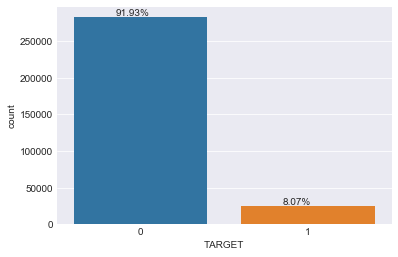

In [170]:
sns.set_style("darkgrid")
ax = sns.countplot(x="TARGET", data=application_train)
for p in ax.patches:
        ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_train)), (p.get_x()+0.25, p.get_height()+2000))

Most loans are repaid. With 91.93% falling into the repaid category and 8.07% falling into the unpaid category.

__Conclusion__: There is a large class imbalance. This property must be held when creating folds to validate trained models.

# 8. Columns <a name="Columns"></a>

This section just takes a preliminary look at the column values we are working with.

In [169]:
# The set of columns which we will attempt to compare in each of train/test sets
application_test.columns.values

array(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG'

__Conclusion:__ We have a lot of variables here. Luckily many of the values seem similar and some are just aggregates

# 9. Loan Information <a name="LoanInfo"></a>

Here we will dissect information about the loan.

## 9.1 __Loan Type:__ <a name="LoanType"></a>

What type of loan is involved?

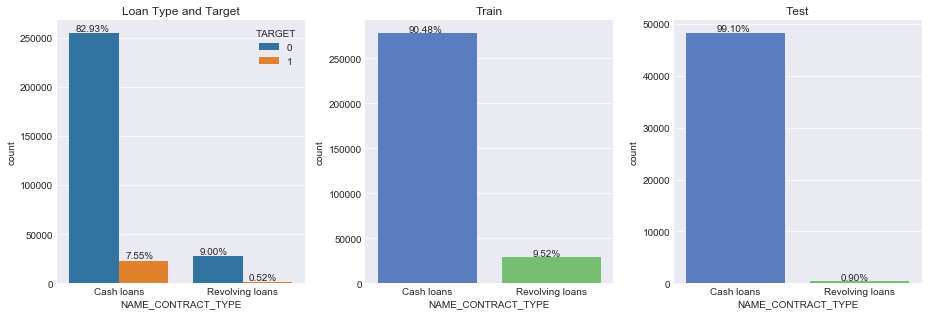

In [246]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,4.5))
plt.subplot(1,3,1)
plt.title("Loan Type and Target")
ax = sns.countplot(x="NAME_CONTRACT_TYPE", hue="TARGET", data = application_train)
for p in ax.patches:
        ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_train)), (p.get_x()+0.05, p.get_height()+2000))
plt.tight_layout()
plt.subplot(1,3,2)
plt.title("Train")
ax = sns.countplot(x="NAME_CONTRACT_TYPE", data=application_train, palette="muted")
for p in ax.patches:
        ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_train)), (p.get_x()+0.25, p.get_height()+1000))
plt.tight_layout()
plt.subplot(1,3,3)
plt.title("Test")
ax = sns.countplot(x="NAME_CONTRACT_TYPE", data=application_test, palette="muted")
for p in ax.patches:
        ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_test)), (p.get_x()+0.25, p.get_height()+250)) 
plt.tight_layout()

In [230]:
loan_type_train = pd.get_dummies(application_train[["NAME_CONTRACT_TYPE","TARGET"]], prefix="OHE")
loan_type_test = pd.get_dummies(application_test[["NAME_CONTRACT_TYPE"]], prefix="OHE")
loan_comparison = loan_type_train.corr()["TARGET"].to_frame(name="Corr")
loan_comparison["Train %"] = 100*loan_type_train.sum()/len(loan_type_train)
loan_comparison["Test %"] = 100*loan_type_test.sum()/len(loan_type_test)
loan_comparison["(Train - Test) %"] = loan_comparison["Train %"] - loan_comparison["Test %"]
loan_comparison.sort_values(by="Corr")

,Corr,Train %,Test %,(Train - Test) %
OHE_Revolving loans,-0.030896,9.521285,0.900624,8.620662
OHE_Cash loans,0.030896,90.478715,99.099376,-8.620662
TARGET,1.000000,8.072882,NaN,NaN


__Revolving Loan__: arrangement which allows the loan to be withdrawn, repaid and redrawn again in any manner and any number of times until the arrangement expires. Examples: credit cards, overdrafts.

__Conclusions:__ The test set in comparison to the training set lacks revolving loans. This could make for an interesting modelling decision where we separate the data into 2 sets based on the type of loan. 

## 9.2 __Credit Amount__ <a name="CreditAmount"></a>

Credit amount of the loan.

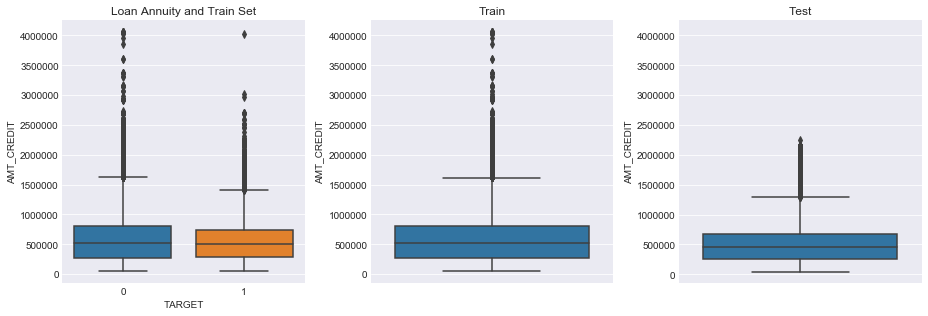

In [300]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,4.5))
plt.subplot(1,3,1)
plt.title("Loan Annuity and Train Set")
sns.boxplot(y="AMT_CREDIT", x="TARGET", data=application_train)
plt.tight_layout()
plt.subplot(1,3,2)
plt.title("Train")
sns.boxplot(y="AMT_CREDIT", data=application_train)
plt.tight_layout()
plt.subplot(1,3,3)
plt.title("Test")
plt.ylim(-150000, 4250000)
sns.boxplot(y="AMT_CREDIT", data=application_test)
plt.tight_layout()

In [231]:
credit_amt_train = application_train[["AMT_CREDIT","TARGET"]]
credit_amt_comparison = credit_amt_train.corr()["TARGET"].to_frame(name="Corr")
credit_amt_comparison

,Corr
AMT_CREDIT,-0.030369
TARGET,1.000000


__Conclusion__: The test and train set seem to be in relative agreement. Once again the train set features many more larger outliers than test most likely due to the size of each set. There seems to exist a small correlation between higher credit amounts and subsequently paying back the loan. 

## 9.3 __Loan Annuity__ <a name="LoanAnn"></a>

__Annuity__: a series of payments made at equal intervals.

Credit amount of the loan.

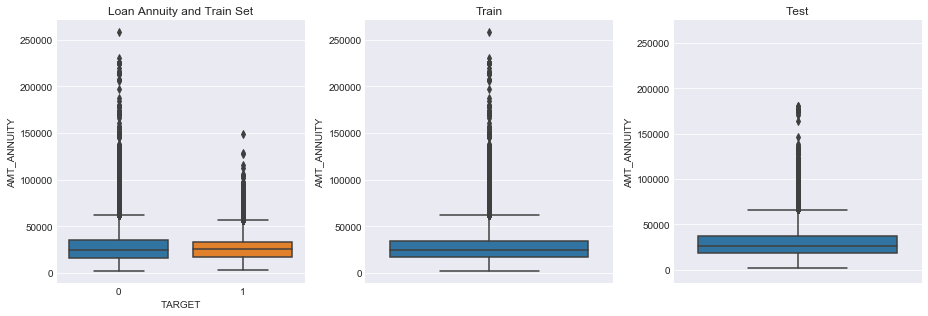

In [288]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,4.5))
plt.subplot(1,3,1)
plt.title("Loan Annuity and Train Set")
sns.boxplot(y="AMT_ANNUITY", x="TARGET", data=application_train)
plt.tight_layout()
plt.subplot(1,3,2)
plt.title("Train")
sns.boxplot(y="AMT_ANNUITY", data=application_train)
plt.tight_layout()
plt.subplot(1,3,3)
plt.title("Test")
plt.ylim(-15000, 275000)
sns.boxplot(y="AMT_ANNUITY", data=application_test)
plt.tight_layout()

In [257]:
credit_amt_train = application_train[["AMT_ANNUITY","TARGET"]]
credit_amt_comparison = credit_amt_train.corr()["TARGET"].to_frame(name="Corr")
credit_amt_comparison

,Corr
AMT_ANNUITY,-0.012817
TARGET,1.000000


__Conclusion__: Both test and train seem to be in relative agreement. Train once again features many more outliers due to the size of the set. There is a small almost neglible correlation between the size of the annuity payment and successfully paying off the loan. One might imagine that those who can't pay back their loans are not able to do so due to the relatively large size of the payment. This feature needs to be investigated further.

## 9.4 __Price of Item__ <a name="PriceItem"></a>

Price of the item, which the loan is being used to finance.

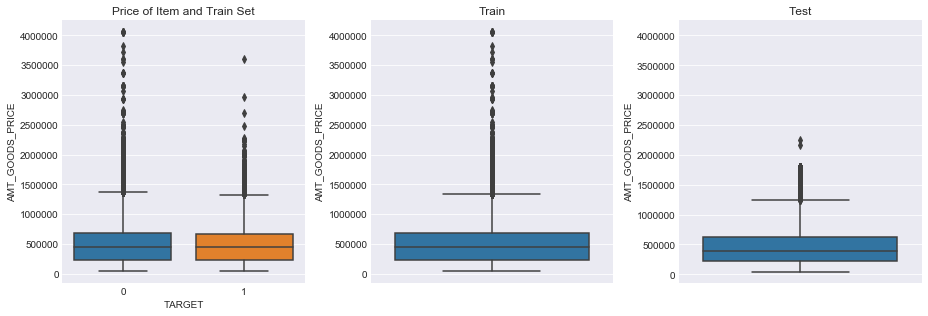

In [282]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,4.5))
plt.subplot(1,3,1)
plt.title("Price of Item and Train Set")
sns.boxplot(y="AMT_GOODS_PRICE", x="TARGET", data=application_train)
plt.tight_layout()
plt.subplot(1,3,2)
plt.title("Train")
sns.boxplot(y="AMT_GOODS_PRICE", data=application_train)
plt.tight_layout()
plt.subplot(1,3,3)
plt.title("Test")
plt.ylim(-150000, 4250000)
sns.boxplot(y="AMT_GOODS_PRICE", data=application_test)
plt.tight_layout()

In [258]:
credit_amt_train = application_train[["AMT_GOODS_PRICE","TARGET"]]
credit_amt_comparison = credit_amt_train.corr()["TARGET"].to_frame(name="Corr")
credit_amt_comparison

,Corr
AMT_GOODS_PRICE,-0.039645
TARGET,1.000000


__Conclusion__: Test and train set seem to differ only on the outliers, overall the boxplots are in agreement. This is probably due to the fact that the train set is much larger and thus should hypothetically features many more. There is a small correlation for loans with higher goods prices being paid back.

# 10. __Income Information__ <a name="IncomeInfo"></a>

Here we take a look at all income information provided.

## 10.1 __Income Type:__ <a name ="IncomeType"></a>

Loanee's income type (businessman, working, maternity leave, ..)

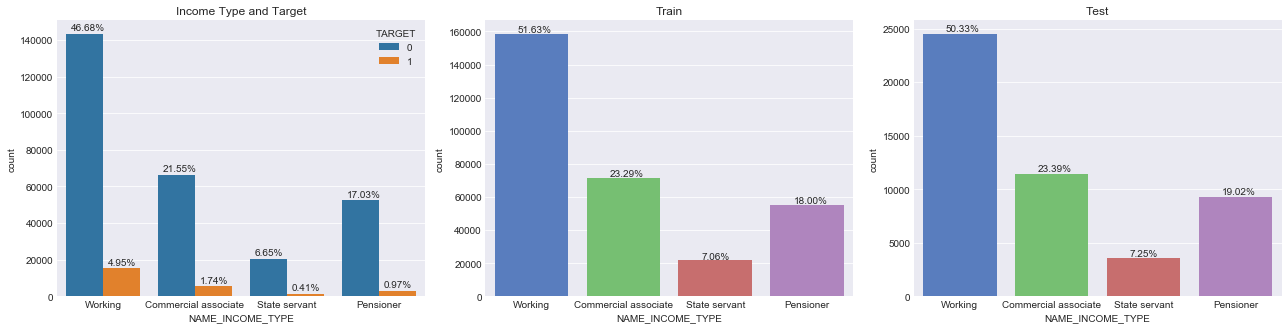

In [233]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,13))
plt.subplot(3,3,1)
plt.title("Income Type and Target")
ax = sns.countplot(x="NAME_INCOME_TYPE", hue="TARGET", data = application_train, order=['Working','Commercial associate','State servant', 'Pensioner'])
for p in ax.patches:
        if np.isnan(p.get_height()): 
            ax.annotate("0%", (p.get_x(), 0))
        else:
            ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_train)), (p.get_x()+0.05, p.get_height()+2000))
plt.tight_layout()
plt.subplot(3,3,2)
plt.title("Train")
ax = sns.countplot(x="NAME_INCOME_TYPE", data=application_train, palette="muted", order=['Working','Commercial associate','State servant', 'Pensioner'])
for p in ax.patches:
        if np.isnan(p.get_height()): 
            ax.annotate("0%", (p.get_x(), 0))
        else:
            ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_train)), (p.get_x()+0.25, p.get_height()+1000))
plt.tight_layout()
plt.subplot(3,3,3)
plt.title("Test")
ax = sns.countplot(x="NAME_INCOME_TYPE", data=application_test, palette="muted", order=['Working','Commercial associate','State servant', 'Pensioner'])
for p in ax.patches:
        if np.isnan(p.get_height()): 
            ax.annotate("0%", (p.get_x(), 0))
        else:
            ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_test)), (p.get_x()+0.25, p.get_height()+250)) 
plt.tight_layout()

In [232]:
income_type_train = pd.get_dummies(application_train[["NAME_INCOME_TYPE","TARGET"]], prefix="OHE")
income_type_test = pd.get_dummies(application_test[["NAME_INCOME_TYPE"]], prefix="OHE")
income_type_comparison = income_type_train.corr()["TARGET"].to_frame(name="Corr")
income_type_comparison["Train %"] = 100*income_type_train.sum()/len(income_type_train)
income_type_comparison["Test %"] = 100*income_type_test.sum()/len(income_type_test)
income_type_comparison["(Train - Test) %"] = income_type_comparison["Train %"] - income_type_comparison["Test %"]
income_type_comparison.sort_values(by="Corr")

,Corr,Train %,Test %,(Train - Test) %
OHE_Pensioner,-0.046209,18.003258,19.023880,-1.020621
OHE_State servant,-0.023447,7.057634,7.246020,-0.188386
OHE_Commercial associate,-0.011906,23.289248,23.391597,-0.102349
OHE_Student,-0.002267,0.005853,0.004103,0.001750
OHE_Businessman,-0.001690,0.003252,0.002052,0.001200
OHE_Maternity leave,0.004726,0.001626,NaN,NaN
OHE_Unemployed,0.008784,0.007154,0.002052,0.005103
OHE_Working,0.057481,51.631974,50.330297,1.301677
TARGET,1.000000,8.072882,NaN,NaN


Only visualized 4 categories that make up for ~98% of the data. 

__Conclusion:__ Test and train set are identical, test just has no applicant with maternity leave. Pensioners seem to be good at paying off loans. "Working", an ambigous term, correlates well with defaulting.

## 10.2 __Occupation Type:__ <a name ="OccupType"></a>

What is the occupation of the applicant?

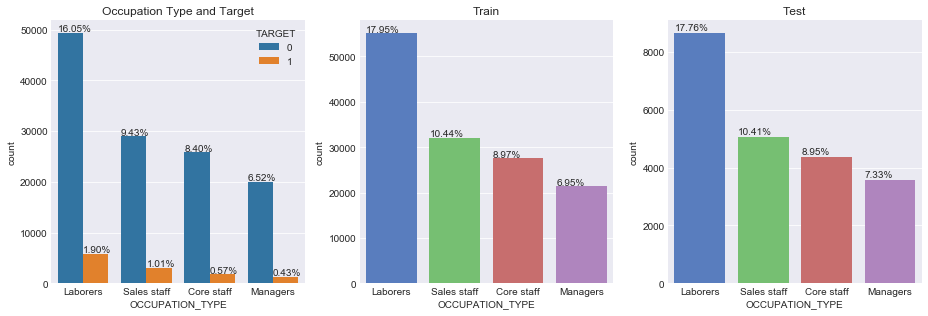

In [253]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,4.5))
plt.subplot(1,3,1)
plt.title("Occupation Type and Target")
ax = sns.countplot(x="OCCUPATION_TYPE", hue="TARGET", data = application_train, order=['Laborers','Sales staff','Core staff', 'Managers'])
for p in ax.patches:
    ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_train)), (p.get_x(), p.get_height()+250))
plt.tight_layout()
plt.subplot(1,3,2)
plt.title("Train")
ax = sns.countplot(x="OCCUPATION_TYPE", data=application_train, palette="muted", order=['Laborers','Sales staff','Core staff', 'Managers'])
for p in ax.patches:
    ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_train)), (p.get_x(), p.get_height()+250))
plt.tight_layout()
plt.subplot(1,3,3)
plt.title("Test")
ax = sns.countplot(x="OCCUPATION_TYPE", data=application_test, palette="muted", order=['Laborers','Sales staff','Core staff', 'Managers'])
for p in ax.patches:
    ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_test)), (p.get_x(), p.get_height()+100)) 
plt.tight_layout()

In [260]:
occupation_type_train = pd.get_dummies(application_train[["OCCUPATION_TYPE","TARGET"]], prefix="OHE")
occupation_type_test = pd.get_dummies(application_test[["OCCUPATION_TYPE"]], prefix="OHE")
occupation_comparison = occupation_type_train.corr()["TARGET"].to_frame(name="Corr")
occupation_comparison["Train %"] = 100*occupation_type_train.sum()/len(occupation_type_train)
occupation_comparison["Test %"] = 100*occupation_type_test.sum()/len(occupation_type_test)
occupation_comparison["(Train - Test) %"] = occupation_comparison["Train %"] - occupation_comparison["Test %"]
occupation_comparison[abs(occupation_comparison["Corr"]) >= 0.01].sort_values(by="Corr")

,Corr,Train %,Test %,(Train - Test) %
OHE_Accountants,-0.021610,3.191105,3.339898,-0.148793
OHE_Core staff,-0.020378,8.965533,8.946742,0.018791
OHE_Managers,-0.018648,6.949670,7.332184,-0.382514
OHE_High skill tech staff,-0.013766,3.700681,3.803545,-0.102864
OHE_Cooking staff,0.012222,1.933589,1.834072,0.099517
OHE_Security staff,0.014648,2.185613,1.877154,0.308459
OHE_Sales staff,0.019537,10.439301,10.405383,0.033918
OHE_Low-skill Laborers,0.027591,0.680626,0.558017,0.122609
OHE_Drivers,0.030303,6.049540,5.688905,0.360634
OHE_Laborers,0.043019,17.946025,17.756032,0.189993


__Conclusion:__ Laborers, drivers, low-skill laborers seem to default more often. The test and train set are once again very identical.

## 10.3 __Organization Type__ <a name="Organ"></a>

What kind of an organization does the applicant work for?

In [261]:
organ_type_train = pd.get_dummies(application_train[["ORGANIZATION_TYPE","TARGET"]], prefix="OHE")
organ_type_test = pd.get_dummies(application_test[["ORGANIZATION_TYPE"]], prefix="OHE")
organ_comparison = organ_type_train.corr()["TARGET"].to_frame(name="Corr")
organ_comparison["Train %"] = 100*organ_type_train.sum()/len(organ_type_train)
organ_comparison["Test %"] = 100*organ_type_test.sum()/len(organ_type_test)
organ_comparison["(Train - Test) %"] = organ_comparison["Train %"] - organ_comparison["Test %"]
organ_comparison[abs(organ_comparison["Corr"]) >= 0.01].sort_values(by="Corr")

,Corr,Train %,Test %,(Train - Test) %
OHE_XNA,-0.045987,18.007161,19.025931,-1.018771
OHE_School,-0.013671,2.891929,2.640325,0.251604
OHE_Medicine,-0.010619,3.639870,3.520433,0.119437
OHE_Military,-0.010057,0.856555,1.087313,-0.230759
OHE_Restaurant,0.010266,0.588922,0.582636,0.006286
OHE_Transport: type 3,0.017552,0.386002,0.356967,0.029035
OHE_Construction,0.019792,2.185613,2.131544,0.054068
OHE_Business Entity Type 3,0.023993,22.110429,22.238634,-0.128206
OHE_Self-employed,0.029139,12.491260,12.145085,0.346176
TARGET,1.000000,8.072882,NaN,NaN


__Conclusion__: Train and test are agreement. Applicants who are employed by unknown organizations (XNA) seem to correlate better with not defaulting. Applicants who are self-employed or work for business entity 3 tend to default more often. 

## 10.4 __Income Total:__ <a name ="IncomeTotal"></a>

How much does the applicant earn?

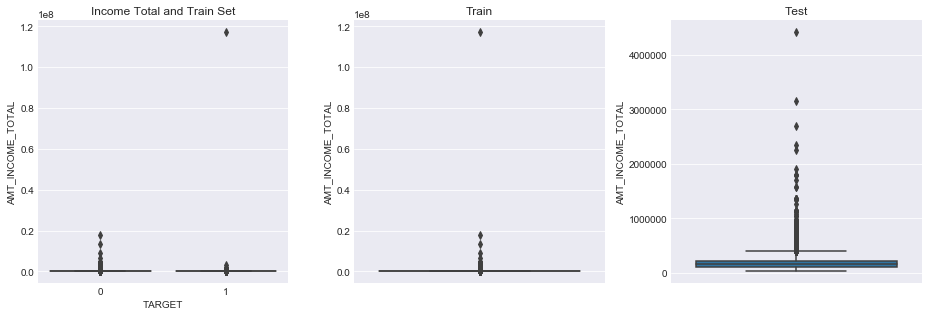

In [311]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,4.5))
plt.subplot(1,3,1)
plt.title("Income Total and Train Set")
sns.boxplot(y="AMT_INCOME_TOTAL", x="TARGET", data=application_train)
plt.tight_layout()
plt.subplot(1,3,2)
plt.title("Train")
sns.boxplot(y="AMT_INCOME_TOTAL", data=application_train)
plt.tight_layout()
plt.subplot(1,3,3)
plt.title("Test")
sns.boxplot(y="AMT_INCOME_TOTAL", data=application_test)
plt.tight_layout()

Looks like we have an outlier that skews the visualization. Interestingly, the largest income defaulted! Lets take a look at the general structure of the data.

In [316]:
application_train["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
Lets take a look at the top 10 percent and bottom 10 percent of values

In [374]:
print("90th percentile:  ", application_train.AMT_INCOME_TOTAL.quantile(0.9))
print("95th percentile:  ", application_train.AMT_INCOME_TOTAL.quantile(0.95))
print("97.5th percentile:", application_train.AMT_INCOME_TOTAL.quantile(0.975))
print("99th percentile:  ", application_train.AMT_INCOME_TOTAL.quantile(0.99))
print("99.9th percentile:", application_train.AMT_INCOME_TOTAL.quantile(0.999))
print("Max value:        ", application_train.AMT_INCOME_TOTAL.max())

90th percentile:   270000.0
95th percentile:   337500.0
97.5th percentile: 405000.0
99th percentile:   472500.0
99.9th percentile: 900000.0
Max value:         117000000.0


In [348]:
print("10th percentile: ", application_train.AMT_INCOME_TOTAL.quantile(0.1))
print("5th percentile:  ", application_train.AMT_INCOME_TOTAL.quantile(0.05))
print("2.5th percentile:", application_train.AMT_INCOME_TOTAL.quantile(0.025))
print("1th percentile:  ", application_train.AMT_INCOME_TOTAL.quantile(0.01))
print("0.1th percentile:", application_train.AMT_INCOME_TOTAL.quantile(0.001))
print("Min value:       ", application_train.AMT_INCOME_TOTAL.min())

10th percentile:  81000.0
5th percentile:   67500.0
2.5th percentile: 58500.0
1th percentile:   45000.0
0.1th percentile: 31500.0
Min value:        25650.0


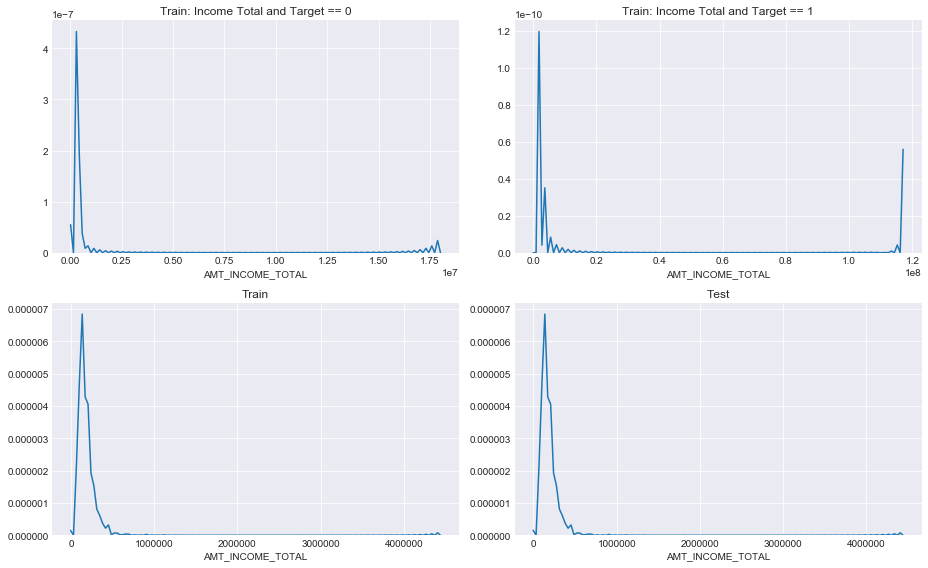

In [371]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,8))
plt.subplot(2,2,1)
plt.title("Train: Income Total and Target == 0")
plot_target_0 = application_train[application_train["TARGET"] == 0]
plot_target_1 = application_train[application_train["TARGET"] == 1]
sns.distplot(plot_target_0["AMT_INCOME_TOTAL"], hist=False)
plt.tight_layout()
plt.subplot(2,2,2)
plt.title("Train: Income Total and Target == 1")
sns.distplot(plot_target_1["AMT_INCOME_TOTAL"], hist=False)
plt.tight_layout()
plt.subplot(2,2,3)
plt.title("Train")
sns.distplot(application_test["AMT_INCOME_TOTAL"], hist=False)
plt.tight_layout()
plt.subplot(2,2,4)
plt.title("Test")
sns.distplot(application_test["AMT_INCOME_TOTAL"], hist=False)
plt.tight_layout()

In [383]:
income_total_train = application_train[["AMT_INCOME_TOTAL","TARGET"]]
income_total_train_no_outlier = income_total_train[income_total_train["AMT_INCOME_TOTAL"] < application_train.AMT_INCOME_TOTAL.max()]
income_total_train_no_outlier = income_total_train_no_outlier[["AMT_INCOME_TOTAL","TARGET"]]
income_total_comparison = income_total_train.corr()["TARGET"].to_frame(name="Corr")
income_total_comparison_no_outlier = income_total_train_no_outlier.corr()["TARGET"].to_frame(name="Corr")
print("With outlier:   ", income_total_comparison)
print("Without outlier:", income_total_comparison_no_outlier)

With outlier:                          Corr
AMT_INCOME_TOTAL -0.003982
TARGET            1.000000
Without outlier:                      Corr
AMT_INCOME_TOTAL -0.02046
TARGET            1.00000


__Conclusion__: There exists an important outlier where the individual earned an enormous salary and defaulted on their loan. The correlation value without the outlier seems to improve by a massive margin (almost 10 times), although still small, it shows a small correlation between a larger income and not defaulting.

## 10.5 Length of Employment <a name="EmployLength"></a>

How long has the applicant been employed at the time of application.

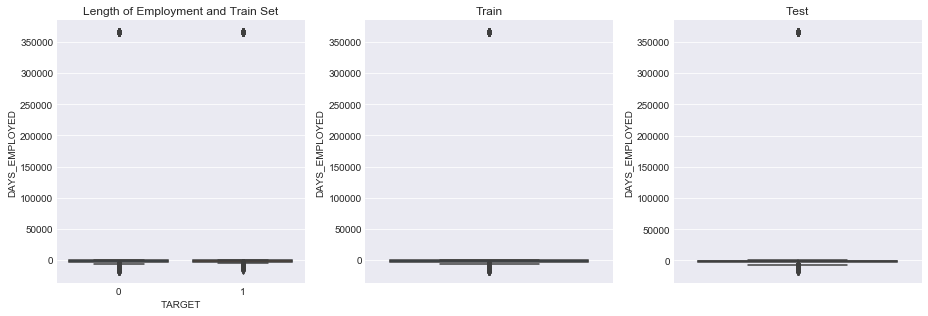

In [393]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,4.5))
plt.subplot(1,3,1)
plt.title("Length of Employment and Train Set")
sns.boxplot(y="DAYS_EMPLOYED", x="TARGET", data=application_train)
plt.tight_layout()
plt.subplot(1,3,2)
plt.title("Train")
sns.boxplot(y="DAYS_EMPLOYED", data=application_train)
plt.tight_layout()
plt.subplot(1,3,3)
plt.title("Test")
sns.boxplot(y="DAYS_EMPLOYED", data=application_test)
plt.tight_layout()

A portion of the set seem to be employed for over 350,000 days. This comes out to almost 1000 years of work. That's impossible. Instead let's try to create "bins". We'll inspect 3 cases: all the data, only outliers and without outliers.

In [408]:
# inspecting all
all_employment = application_train[["DAYS_EMPLOYED","TARGET"]]
all_employment_corr = all_employment.corr()["TARGET"].to_frame(name="Corr")
all_employment_corr

,Corr
DAYS_EMPLOYED,-0.044932
TARGET,1.000000


In [417]:
only_long_employment = application_train[application_train["DAYS_EMPLOYED"] > 300000]
only_long_employment = only_long_employment[["DAYS_EMPLOYED","TARGET"]]
only_long_employment_corr = only_long_employment.corr()["TARGET"].to_frame(name="Corr")
only_long_employment.describe()

,DAYS_EMPLOYED,TARGET
count,55374.0,55374.000000
mean,365243.0,0.053996
std,0.0,0.226013
min,365243.0,0.000000
25%,365243.0,0.000000
50%,365243.0,0.000000
75%,365243.0,0.000000
max,365243.0,1.000000


In [409]:
wo_long_employment = application_train[application_train["DAYS_EMPLOYED"] < 300000]
wo_long_employment = wo_long_employment[["DAYS_EMPLOYED","TARGET"]]
correl_long_employment = wo_long_employment.corr()["TARGET"].to_frame(name="Corr")
correl_long_employment

,Corr
DAYS_EMPLOYED,0.074958
TARGET,1.000000


__Conclusion__: All the outlier values seem to be equal to 365243 days worked. These values should be treated as unknown. There does seem to be a positive correlation with days_employed and defaulting on the loan. 

# 11. __Who is our Applicant?__ <a name="Who"></a>

Why is it important to understand who our applicant is? 

## 11.1 __Education:__ <a name ="Education"></a>

What is the highest attained level of education for our applicant?

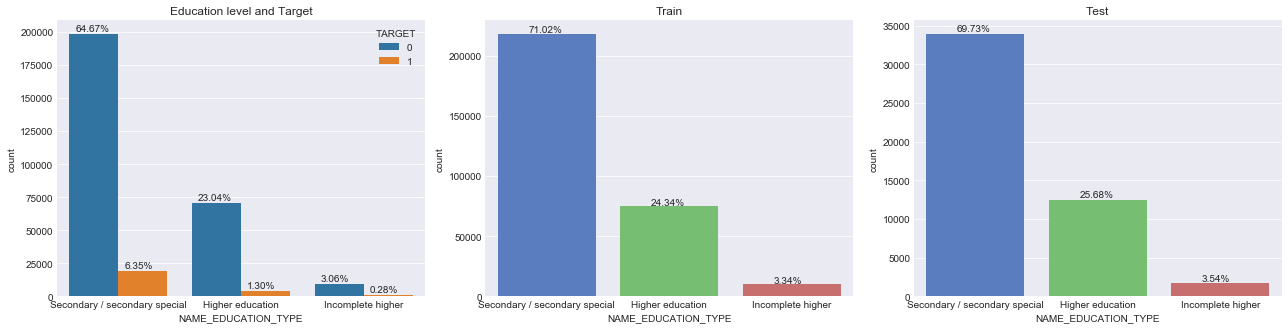

In [235]:
plt.figure(figsize=(18,13))
plt.subplot(3,3,1)
plt.title("Education level and Target")
ax = sns.countplot(x="NAME_EDUCATION_TYPE", hue="TARGET", data = application_train, order=['Secondary / secondary special', 'Higher education','Incomplete higher'])
for p in ax.patches:
        if np.isnan(p.get_height()): 
            ax.annotate("0%", (p.get_x(), 0))
        else:
            ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_train)), (p.get_x()+0.05, p.get_height()+2000))
plt.tight_layout()
plt.subplot(3,3,2)
plt.title("Train")
ax = sns.countplot(x="NAME_EDUCATION_TYPE", data=application_train, palette="muted", order=['Secondary / secondary special', 'Higher education','Incomplete higher'])
for p in ax.patches:
        if np.isnan(p.get_height()): 
            ax.annotate("0%", (p.get_x(), 0))
        else:
            ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_train)), (p.get_x()+0.25, p.get_height()+1000))
plt.tight_layout()
plt.subplot(3,3,3)
plt.title("Test")
ax = sns.countplot(x="NAME_EDUCATION_TYPE", data=application_test, palette="muted", order=['Secondary / secondary special', 'Higher education','Incomplete higher'])
for p in ax.patches:
        if np.isnan(p.get_height()): 
            ax.annotate("0%", (p.get_x(), 0))
        else:
            ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_test)), (p.get_x()+0.25, p.get_height()+250)) 
plt.tight_layout()

In [235]:
edu_level_train = pd.get_dummies(application_train[["NAME_EDUCATION_TYPE","TARGET"]], prefix="OHE")
edu_level_test = pd.get_dummies(application_test[["NAME_EDUCATION_TYPE"]], prefix="OHE")
edu_level_comparison = edu_level_train.corr()["TARGET"].to_frame(name="Corr")
edu_level_comparison["Train %"] = 100*edu_level_train.sum()/len(edu_level_train)
edu_level_comparison["Test %"] = 100*edu_level_test.sum()/len(edu_level_test)
edu_level_comparison["(Train - Test) %"] = edu_level_comparison["Train %"] - edu_level_comparison["Test %"]
edu_level_comparison.sort_values(by="Corr")

,Corr,Train %,Test %,(Train - Test) %
OHE_Higher education,-0.056593,24.344820,25.677006,-1.332186
OHE_Academic degree,-0.005294,0.053331,0.084113,-0.030781
OHE_Incomplete higher,0.002813,3.341994,3.536846,-0.194851
OHE_Lower secondary,0.011747,1.240931,0.974479,0.266452
OHE_Secondary / secondary special,0.049824,71.018923,69.727556,1.291367
TARGET,1.000000,8.072882,NaN,NaN


Only visually significant levels are shown.

__Conclusion:__ Train and test are identical. Higher education bodes well with for not defaulting. Secondary / secondary special seems to be related with defaulting.

## 11.2 __Age:__ <a name ="Age"></a>

How old (or young) is our applicant?

C:\Users\Pavle\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 936x360 with 0 Axes>

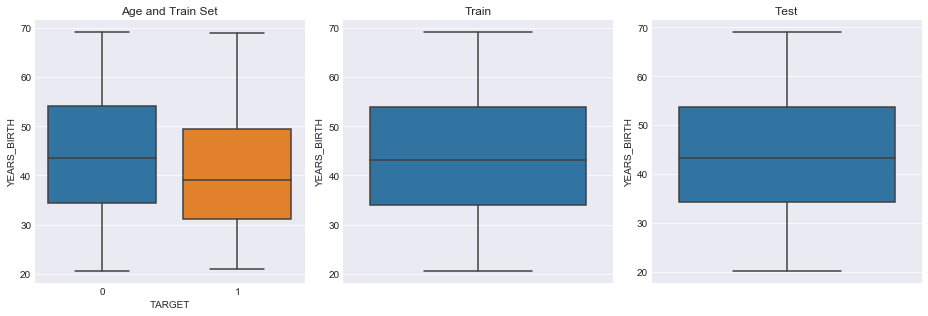

In [67]:
plt.figure(figsize=(13,5))
age_train = application_train[["DAYS_BIRTH","TARGET"]]
age_train["YEARS_BIRTH"] = -1*age_train["DAYS_BIRTH"]/365.24
age_test = application_test
age_test["YEARS_BIRTH"] = -1*age_test["DAYS_BIRTH"]/365.24
sns.set_style("darkgrid")
plt.figure(figsize=(13,4.5))
plt.subplot(1,3,1)
plt.title("Age and Train Set")
sns.boxplot(y="YEARS_BIRTH", x="TARGET", data=age_train)
plt.tight_layout()
plt.subplot(1,3,2)
plt.title("Train")
sns.boxplot(y="YEARS_BIRTH", data=age_train)
plt.tight_layout()
plt.subplot(1,3,3)
plt.title("Test")
sns.boxplot(y="YEARS_BIRTH", data=age_test)
plt.tight_layout()

In [14]:
age_train = age_train[["YEARS_BIRTH","TARGET"]]
age_comparison = age_train.corr()["TARGET"].to_frame(name="Corr")
age_comparison

,Corr
YEARS_BIRTH,-0.078239
TARGET,1.000000


__Conclusion__: Both distributions are in agreement. There is a small negative correlation with years. It seems that older applicants tend to default less.

## 11.3 __Gender:__ <a name ="Gender"></a>

What is the gender of the loanee?

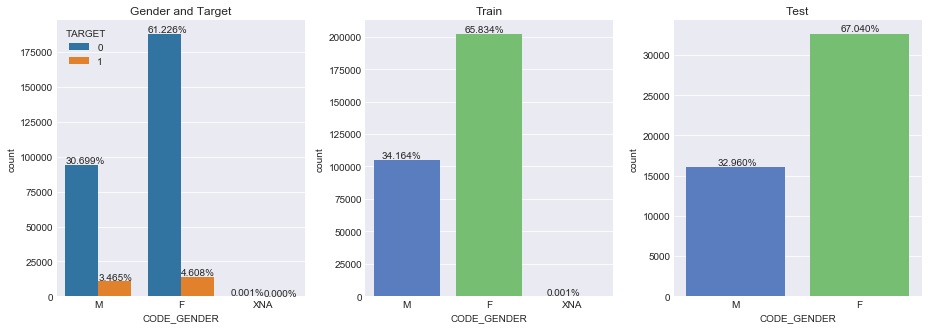

In [228]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,13))
plt.subplot(3,3,1)
plt.title("Gender and Target")
ax = sns.countplot(x="CODE_GENDER", hue="TARGET", data = application_train)
for p in ax.patches:
        if np.isnan(p.get_height()): 
            ax.annotate("0.000%", (p.get_x(), 0))
        else:
            ax.annotate("{0:.03f}%".format(100*p.get_height()/len(application_train)), (p.get_x(), p.get_height()+1000))
plt.tight_layout()
plt.subplot(3,3,2)
plt.title("Train")
ax = sns.countplot(x="CODE_GENDER", data=application_train, palette="muted")
for p in ax.patches:
        if np.isnan(p.get_height()): 
            ax.annotate("0.000%", (p.get_x(), 0))
        else:
            ax.annotate("{0:.03f}%".format(100*p.get_height()/len(application_train)), (p.get_x()+0.1, p.get_height()+1000))
plt.tight_layout()
plt.subplot(3,3,3)
plt.title("Test")
ax = sns.countplot(x="CODE_GENDER", data=application_test, palette="muted", order=["M","F"])
for p in ax.patches:
        if np.isnan(p.get_height()): 
            ax.annotate("0.000%", (p.get_x(), 0))
        else:
            ax.annotate("{0:.03f}%".format(100*p.get_height()/len(application_test)), (p.get_x()+0.25, p.get_height()+250)) 
plt.tight_layout()

In [236]:
gender_train = pd.get_dummies(application_train[["CODE_GENDER","TARGET"]], prefix="OHE")
gender_test = pd.get_dummies(application_test[["CODE_GENDER"]], prefix="OHE")
gender_comparison = gender_train.corr()["TARGET"].to_frame(name="Corr")
gender_comparison["Train %"] = 100*gender_train.sum()/len(gender_train)
gender_comparison["Test %"] = 100*gender_test.sum()/len(gender_test)
gender_comparison["(Train - Test) %"] = gender_comparison["Train %"] - gender_comparison["Test %"]
gender_comparison.sort_values(by="Corr")

,Corr,Train %,Test %,(Train - Test) %
OHE_F,-0.054704,65.834393,67.040046,-1.205653
OHE_XNA,-0.001069,0.001301,NaN,NaN
OHE_M,0.054713,34.164306,32.959954,1.204352
TARGET,1.000000,8.072882,NaN,NaN


XNA represents an unknown gender. M/F correspond to male/female. 

__Conclusions:__  Many more females apply for loans. XNA will be ignored. Males seem to default much more often compared to females.

# 12. __Family of Applicant__ <a name="Family"></a>

Family of applicant

## 12.1 __Family Status:__ <a name ="FamilyStatus"></a>

Family status of the loanee.

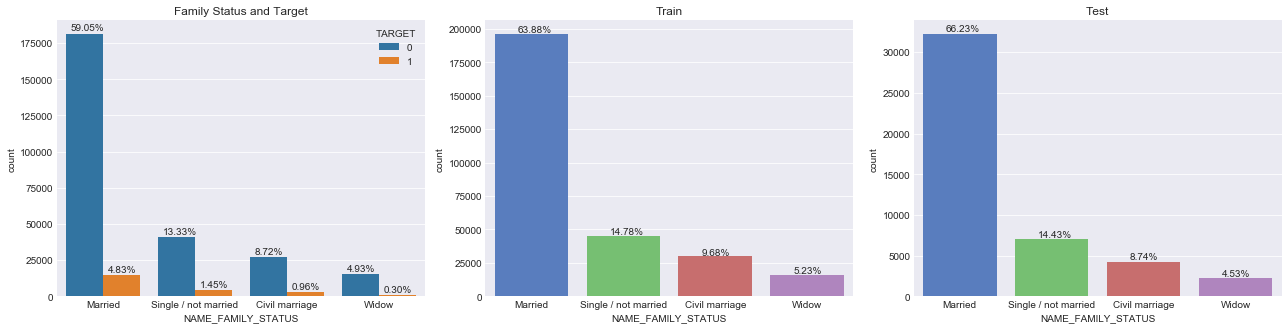

In [15]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,13))
plt.subplot(3,3,1)
plt.title("Family Status and Target")
ax = sns.countplot(x="NAME_FAMILY_STATUS", hue="TARGET", data = application_train,order=["Married","Single / not married","Civil marriage","Widow"])
for p in ax.patches:
        if np.isnan(p.get_height()): 
            ax.annotate("0%", (p.get_x(), 0))
        else:
            ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_train)), (p.get_x()+0.05, p.get_height()+2000))
plt.tight_layout()
plt.subplot(3,3,2)
plt.title("Train")
ax = sns.countplot(x="NAME_FAMILY_STATUS", data=application_train, palette="muted", order=["Married","Single / not married","Civil marriage","Widow"])
for p in ax.patches:
        if np.isnan(p.get_height()): 
            ax.annotate("0%", (p.get_x(), 0))
        else:
            ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_train)), (p.get_x()+0.25, p.get_height()+1000))
plt.tight_layout()
plt.subplot(3,3,3)
plt.title("Test")
ax = sns.countplot(x="NAME_FAMILY_STATUS", data=application_test, palette="muted", order=["Married","Single / not married","Civil marriage","Widow"])
for p in ax.patches:
        if np.isnan(p.get_height()): 
            ax.annotate("0%", (p.get_x(), 0))
        else:
            ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_test)), (p.get_x()+0.25, p.get_height()+250)) 
plt.tight_layout()

In [237]:
family_status_train = pd.get_dummies(application_train[["NAME_FAMILY_STATUS","TARGET"]], prefix="OHE")
family_status_test = pd.get_dummies(application_test[["NAME_FAMILY_STATUS"]], prefix="OHE")
family_status_comparison = family_status_train.corr()["TARGET"].to_frame(name="Corr")
family_status_comparison["Train %"] = 100*family_status_train.sum()/len(family_status_train)
family_status_comparison["Test %"] = 100*family_status_test.sum()/len(family_status_test)
family_status_comparison["(Train - Test) %"] = family_status_comparison["Train %"] - family_status_comparison["Test %"]
family_status_comparison.sort_values(by="Corr")

,Corr,Train %,Test %,(Train - Test) %
OHE_Married,-0.025043,63.878040,66.229690,-2.351650
OHE_Widow,-0.019394,5.231683,4.531840,0.699843
OHE_Unknown,-0.000756,0.000650,NaN,NaN
OHE_Separated,0.001168,6.429038,6.062285,0.366754
OHE_Civil marriage,0.022496,9.682580,8.741589,0.940992
OHE_Single / not married,0.026518,14.778008,14.434597,0.343411
TARGET,1.000000,8.072882,NaN,NaN


__Conclusion__: Unknown is not represented in Test and represents a small portion of the training data. Being single and being in a civil marriage seem to correlate with defaulting. Being married or a widow correlates well with paying off loans.

## 12.2 __Number of Family Members:__ <a name ="CountFamily"></a>

C:\Users\Pavle\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Pavle\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


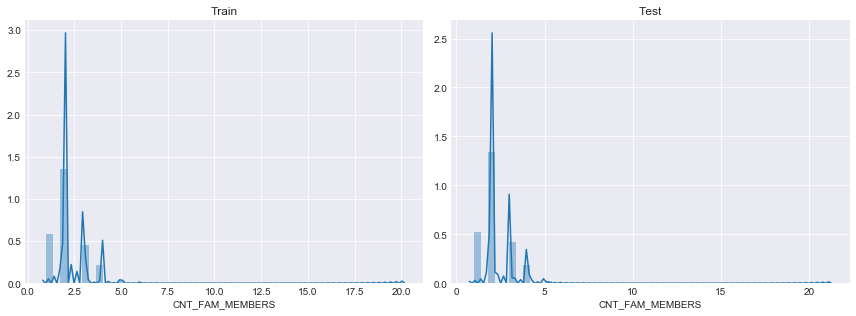

In [263]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,4.5))
plt.subplot(1,2,1)
plt.title("Train")
sns.distplot(application_train["CNT_FAM_MEMBERS"].dropna(), hist=True)
plt.tight_layout()
plt.subplot(1,2,2)
plt.title("Test")
sns.distplot(application_test["CNT_FAM_MEMBERS"].dropna(), hist=True)
plt.tight_layout()

In [213]:
family_cnt_train = pd.get_dummies(application_train[["CNT_FAM_MEMBERS","TARGET"]], prefix="OHE",columns=["CNT_FAM_MEMBERS"],dummy_na=True)
family_cnt_test = pd.get_dummies(application_test[["CNT_FAM_MEMBERS"]], prefix="OHE",columns=["CNT_FAM_MEMBERS"],dummy_na=True)
family_cnt_comparison = family_cnt_train.corr()["TARGET"].to_frame(name="Corr")
family_cnt_comparison["Train %"] = 100*family_cnt_train.sum()/len(family_cnt_train)
family_cnt_comparison["Test %"] = 100*family_cnt_test.sum()/len(family_cnt_test)
family_cnt_comparison["(Train - Test) %"] = family_cnt_comparison["Train %"] - family_cnt_comparison["Test %"]
family_cnt_comparison

,Corr,Train %,Test %,(Train - Test) %
TARGET,1.000000,8.072882,NaN,NaN
OHE_1.0,0.005694,22.063276,21.030281,1.032995
OHE_2.0,-0.018510,51.496369,53.450681,-1.954312
OHE_3.0,0.011463,17.105404,16.767192,0.338213
OHE_4.0,0.006248,8.031257,7.570162,0.461095
OHE_5.0,0.005218,1.131016,1.050386,0.080631
OHE_6.0,0.007235,0.132678,0.088216,0.044462
OHE_7.0,-0.000397,0.026341,0.024618,0.001722
OHE_8.0,0.006491,0.006504,0.004103,0.002401
OHE_9.0,-0.001309,0.001951,0.002052,-0.000100


__Conclusion__: there does not seem to be any discernable features from the number of family members. This should be dropped.

## 12.3 __Children:__ <a name ="Children"></a>

Number of children loanee has.

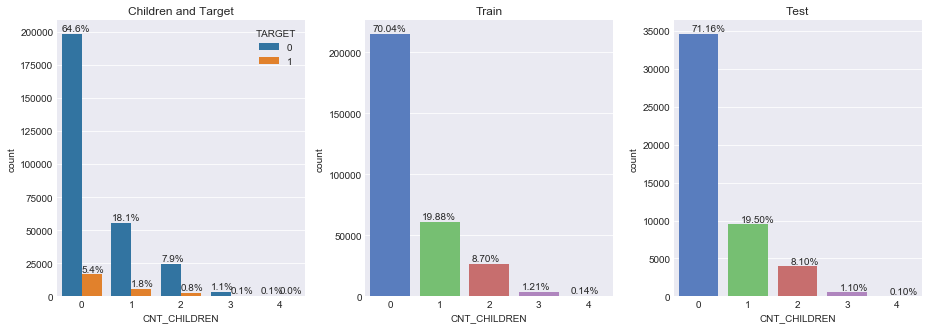

In [16]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,13))
plt.subplot(3,3,1)
plt.title("Children and Target")
ax = sns.countplot(x="CNT_CHILDREN", hue="TARGET", data = application_train, order=[0,1,2,3,4])
for p in ax.patches:
        if np.isnan(p.get_height()): 
            ax.annotate("0%", (p.get_x(), 0))
        else:
            ax.annotate("{0:.01f}%".format(100*p.get_height()/len(application_train)), (p.get_x(), p.get_height()+2000))
plt.tight_layout()
plt.subplot(3,3,2)
plt.title("Train")
ax = sns.countplot(x="CNT_CHILDREN", data=application_train, palette="muted", order=[0,1,2,3,4])
for p in ax.patches:
        if np.isnan(p.get_height()): 
            ax.annotate("0%", (p.get_x(), 0))
        else:
            ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_train)), (p.get_x()+0.05, p.get_height()+2000))
plt.tight_layout()
plt.subplot(3,3,3)
plt.title("Test")
ax = sns.countplot(x="CNT_CHILDREN", data=application_test, palette="muted", order=[0,1,2,3,4])
for p in ax.patches:
        if np.isnan(p.get_height()): 
            ax.annotate("0%", (p.get_x(), 0))
        else:
            ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_test)), (p.get_x()+0.25, p.get_height()+250)) 
plt.tight_layout()

In [17]:
cnt_child_train = pd.get_dummies(application_train[["CNT_CHILDREN","TARGET"]], prefix="OHE", columns=["CNT_CHILDREN"])
cnt_child_test = pd.get_dummies(application_test[["CNT_CHILDREN"]], prefix="OHE", columns=["CNT_CHILDREN"])
cnt_child_comparison = cnt_child_train.corr()["TARGET"].to_frame(name="Corr")
cnt_child_comparison["Train %"] = 100*cnt_child_train.sum()/len(cnt_child_train)
cnt_child_comparison["Test %"] = 100*cnt_child_test.sum()/len(cnt_child_test)
cnt_child_comparison["(Train - Test) %"] = cnt_child_comparison["Train %"] - cnt_child_comparison["Test %"]
cnt_child_comparison

,Corr,Train %,Test %,(Train - Test) %
TARGET,1.000000,8.072882,NaN,NaN
OHE_0,-0.020264,70.036844,71.157476,-1.120632
OHE_1,0.015553,19.875387,19.497784,0.377602
OHE_2,0.007353,8.698551,8.101510,0.597041
OHE_3,0.006328,1.208737,1.097571,0.111166
OHE_4,0.006514,0.139507,0.100525,0.038982
OHE_5,0.000158,0.027316,0.024618,0.002698
OHE_6,0.006218,0.006829,0.006155,0.000674
OHE_7,-0.001414,0.002276,0.002052,0.000225
OHE_8,-0.000756,0.000650,0.006155,-0.005504


In [18]:
application_train[["CNT_CHILDREN","TARGET"]].corr()["TARGET"].to_frame(name="Corr")

,Corr
CNT_CHILDREN,0.019187
TARGET,1.000000


Each plot only shows a loanee having up to 4 children

__Conclusion__: Test and train have an identical distribution except train has more cases where applicants have many children (9,10,12,14 and 19). Applicants without children seem to have an easier time paying off loans. Most applicants are without children.

# 13. __Housing__ <a name="Housing"></a>

Information about applicant's housing situation

## 13.1 __Realty:__ <a name ="Realty"></a>

Does the loanee own realty?

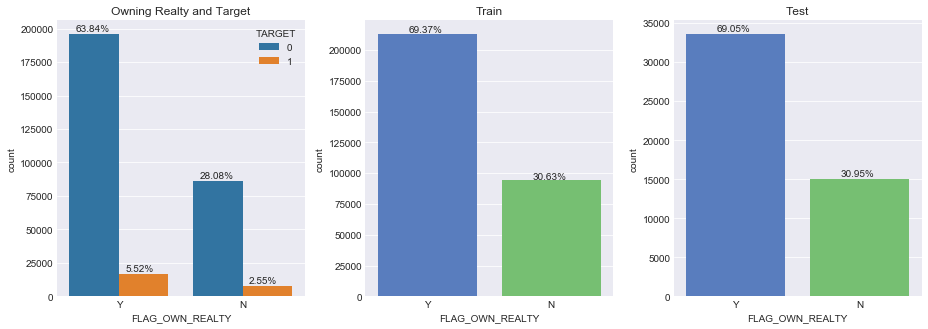

In [230]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,13))
plt.subplot(3,3,1)
plt.title("Owning Realty and Target")
ax = sns.countplot(x="FLAG_OWN_REALTY", hue="TARGET", data = application_train)
for p in ax.patches:
        ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_train)), (p.get_x()+0.05, p.get_height()+2000))
plt.tight_layout()
plt.subplot(3,3,2)
plt.title("Train")
ax = sns.countplot(x="FLAG_OWN_REALTY", data=application_train, palette="muted")
for p in ax.patches:
        ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_train)), (p.get_x()+0.25, p.get_height()+1000))
plt.tight_layout()
plt.subplot(3,3,3)
plt.title("Test")
ax = sns.countplot(x="FLAG_OWN_REALTY", data=application_test, palette="muted")
for p in ax.patches:
        ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_test)), (p.get_x()+0.25, p.get_height()+250)) 
plt.tight_layout()

In [238]:
realty_train = pd.get_dummies(application_train[["FLAG_OWN_REALTY","TARGET"]], prefix="OHE")
realty_test = pd.get_dummies(application_test[["FLAG_OWN_REALTY"]], prefix="OHE")
realty_comparison = realty_train.corr()["TARGET"].to_frame(name="Corr")
realty_comparison["Train %"] = 100*realty_train.sum()/len(realty_train)
realty_comparison["Test %"] = 100*realty_test.sum()/len(realty_test)
realty_comparison["(Train - Test) %"] = realty_comparison["Train %"] - realty_comparison["Test %"]
realty_comparison.sort_values(by="Corr")

,Corr,Train %,Test %,(Train - Test) %
OHE_Y,-0.006148,69.367275,69.05055,0.316725
OHE_N,0.006148,30.632725,30.94945,-0.316725
TARGET,1.000000,8.072882,NaN,NaN


Y means that the loanee owns realty, N means that the loanee does not own realty.

__Conclusions__: Most loanees own some form of realty. Train and test are identitcal in terms of distribution. There is no real correlation between owning realty and defaulting on a loan. This column could be removed.

## 13.2 __Housing Situation:__ <a name ="HousingSit"></a>

Housing situation of loan applicant.

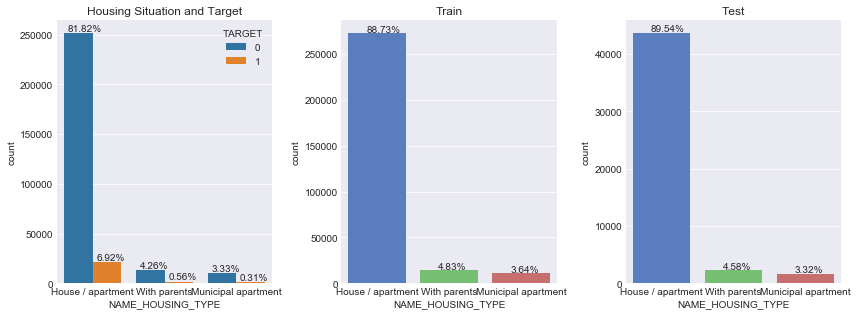

In [266]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,4.5))
plt.subplot(1,3,1)
plt.title("Housing Situation and Target")
ax = sns.countplot(x="NAME_HOUSING_TYPE", hue="TARGET", data = application_train,order=["House / apartment","With parents","Municipal apartment"])
for p in ax.patches:
        ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_train)), (p.get_x()+0.05, p.get_height()+2000))
plt.tight_layout()
plt.subplot(1,3,2)
plt.title("Train")
ax = sns.countplot(x="NAME_HOUSING_TYPE", data=application_train, palette="muted", order=["House / apartment","With parents","Municipal apartment"])
for p in ax.patches:
        ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_train)), (p.get_x()+0.25, p.get_height()+1000))
plt.tight_layout()
plt.subplot(1,3,3)
plt.title("Test")
ax = sns.countplot(x="NAME_HOUSING_TYPE", data=application_test, palette="muted", order=["House / apartment","With parents","Municipal apartment"])
for p in ax.patches:
        ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_test)), (p.get_x()+0.25, p.get_height()+250)) 
plt.tight_layout()

In [239]:
housing_situation_train = pd.get_dummies(application_train[["NAME_HOUSING_TYPE","TARGET"]], prefix="OHE")
housing_situation_test = pd.get_dummies(application_test[["NAME_HOUSING_TYPE"]], prefix="OHE")
housing_situation_comparison = housing_situation_train.corr()["TARGET"].to_frame(name="Corr")
housing_situation_comparison["Train %"] = 100*housing_situation_train.sum()/len(housing_situation_train)
housing_situation_comparison["Test %"] = 100*housing_situation_test.sum()/len(housing_situation_test)
housing_situation_comparison["(Train - Test) %"] = housing_situation_comparison["Train %"] - housing_situation_comparison["Test %"]
housing_situation_comparison.sort_values(by="Corr")

,Corr,Train %,Test %,(Train - Test) %
OHE_House / apartment,-0.028555,88.734387,89.539225,-0.804839
OHE_Office apartment,-0.005103,0.851026,0.834975,0.016052
OHE_Co-op apartment,-0.000312,0.364865,0.252339,0.112526
OHE_Municipal apartment,0.003329,3.636618,3.317331,0.319287
OHE_Rented apartment,0.019767,1.587260,1.473002,0.114258
OHE_With parents,0.029966,4.825844,4.583128,0.242715
TARGET,1.000000,8.072882,NaN,NaN


__Conclusion__: Train and test are identically distributed. Applicants who live with parents or rent apartments tend to default more often compared to the population. Those who are in a House / apartment which I assume is not rented tend to pay back their loans more often.

## 13.3 __Region__ <a name="Region"></a>

Information about the region the housing

### 13.3.1 __Population of Region__ <a name="RegionPop"></a>

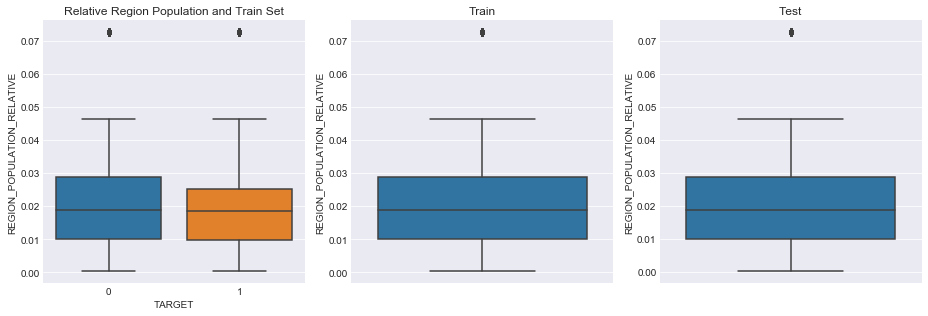

In [20]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,4.5))
plt.subplot(1,3,1)
plt.title("Relative Region Population and Train Set")
sns.boxplot(y="REGION_POPULATION_RELATIVE", x="TARGET", data=application_train)
plt.tight_layout()
plt.subplot(1,3,2)
plt.title("Train")
sns.boxplot(y="REGION_POPULATION_RELATIVE", data=application_train)
plt.tight_layout()
plt.subplot(1,3,3)
plt.title("Test")
sns.boxplot(y="REGION_POPULATION_RELATIVE", data=application_test)
plt.tight_layout()

In [21]:
pop_train = application_train[["REGION_POPULATION_RELATIVE","TARGET"]]
pop_comparison = pop_train.corr()["TARGET"].to_frame(name="Corr")
pop_comparison

,Corr
REGION_POPULATION_RELATIVE,-0.037227
TARGET,1.000000


__Conclusion__: We have a slight negative correlation with population size, suggesting that applicants from more highly populated regions default less often.

### 13.2.2 __Rating of Region__ <a name="RegionRating"></a>

Home Credit's rating of the region with city and without city

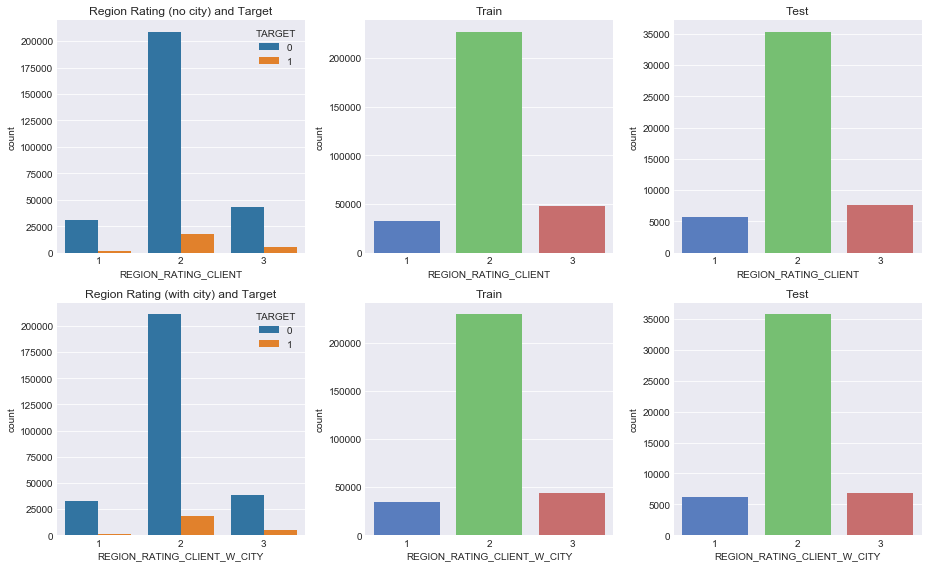

In [38]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,8))
plt.subplot(2,3,1)
plt.title("Region Rating (no city) and Target")
ax = sns.countplot(x="REGION_RATING_CLIENT", hue="TARGET", data = application_train, order=[1,2,3])
plt.tight_layout()
plt.subplot(2,3,2)
plt.title("Train")
ax = sns.countplot(x="REGION_RATING_CLIENT", data=application_train, palette="muted", order=[1,2,3])
plt.tight_layout()
plt.subplot(2,3,3)
plt.title("Test")
ax = sns.countplot(x="REGION_RATING_CLIENT", data=application_test, palette="muted", order=[1,2,3])
plt.tight_layout()
plt.subplot(2,3,4)
plt.title("Region Rating (with city) and Target")
ax = sns.countplot(x="REGION_RATING_CLIENT_W_CITY", hue="TARGET", data = application_train, order=[1,2,3])
plt.tight_layout()
plt.subplot(2,3,5)
plt.title("Train")
ax = sns.countplot(x="REGION_RATING_CLIENT_W_CITY", data=application_train, palette="muted", order=[1,2,3])
plt.tight_layout()
plt.subplot(2,3,6)
plt.title("Test")
ax = sns.countplot(x="REGION_RATING_CLIENT_W_CITY", data=application_test, palette="muted", order=[1,2,3])
plt.tight_layout()

In [240]:
print("NO CITY")
region_rating_nc_train = pd.get_dummies(application_train[["REGION_RATING_CLIENT","TARGET"]], prefix="OHE", columns=["REGION_RATING_CLIENT"])
region_rating_nc_test = pd.get_dummies(application_test[["REGION_RATING_CLIENT"]], prefix="OHE", columns=["REGION_RATING_CLIENT"])
region_rating_nc_comparison = region_rating_nc_train.corr()["TARGET"].to_frame(name="Corr")
region_rating_nc_comparison["Train %"] = 100*region_rating_nc_train.sum()/len(region_rating_nc_train)
region_rating_nc_comparison["Test %"] = 100*region_rating_nc_test.sum()/len(region_rating_nc_test)
region_rating_nc_comparison["(Train - Test) %"] = region_rating_nc_comparison["Train %"] - region_rating_nc_comparison["Test %"]
region_rating_nc_comparison.sort_values(by="Corr")

NO CITY


,Corr,Train %,Test %,(Train - Test) %
OHE_1,-0.040830,10.470195,11.825045,-1.354851
OHE_2,-0.011326,73.813294,72.534055,1.279239
OHE_3,0.048029,15.716511,15.640899,0.075612
TARGET,1.000000,8.072882,NaN,NaN


In [267]:
print("NO CITY, treating as ordinal")
region_rating_nc_train = pd.get_dummies(application_train[["REGION_RATING_CLIENT","TARGET"]], prefix="OHE")
region_rating_nc_train.corr()["TARGET"].to_frame(name="Corr")

NO CITY, treating as ordinal


,Corr
REGION_RATING_CLIENT,0.058899
TARGET,1.000000


In [242]:
print("WITH CITY")
region_rating_train = pd.get_dummies(application_train[["REGION_RATING_CLIENT_W_CITY","TARGET"]], prefix="OHE", columns=["REGION_RATING_CLIENT_W_CITY"])
region_rating_test = pd.get_dummies(application_test[["REGION_RATING_CLIENT_W_CITY"]], prefix="OHE", columns=["REGION_RATING_CLIENT_W_CITY"])
region_rating_comparison = region_rating_train.corr()["TARGET"].to_frame(name="Corr")
region_rating_comparison["Train %"] = 100*region_rating_train.sum()/len(region_rating_train)
region_rating_comparison["Test %"] = 100*region_rating_test.sum()/len(region_rating_test)
region_rating_comparison["(Train - Test) %"] = region_rating_comparison["Train %"] - region_rating_comparison["Test %"]
region_rating_comparison

WITH CITY


,Corr,Train %,Test %,(Train - Test) %
TARGET,1.000000,8.072882,NaN,NaN
OHE_1,-0.041945,11.110822,12.668226,-1.557404
OHE_2,-0.009765,74.626274,73.395700,1.230574
OHE_3,0.049847,14.262904,13.934023,0.328882


In [268]:
print("WITH CITY, treating as ordinal")
region_rating_train = pd.get_dummies(application_train[["REGION_RATING_CLIENT_W_CITY","TARGET"]], prefix="OHE")
region_rating_train.corr()["TARGET"].to_frame(name="Corr")

WITH CITY, treating as ordinal


,Corr
REGION_RATING_CLIENT_W_CITY,0.060893
TARGET,1.000000


__Conclusion__: It looks like interpreting each of the categories ordinally is better than individually, albeit by a small margin. The test and train set are identical.

## 13.3 __About the Housing__ <a name="DetailsHouse"></a>

Information about the house of the applicant

In [56]:
building_cols = ['APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG',
       'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
       'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'TARGET']

In [273]:
building_train = pd.get_dummies(application_train[building_cols])
building_comparison = building_train.corr()["TARGET"].to_frame(name="Corr")
building_comparison[abs(building_comparison["Corr"]) >= 0.02].sort_values(by="Corr")

,Corr
FLOORSMAX_AVG,-0.044003
FLOORSMAX_MEDI,-0.043768
FLOORSMAX_MODE,-0.043226
EMERGENCYSTATE_MODE_No,-0.042201
HOUSETYPE_MODE_block of flats,-0.040594
ELEVATORS_AVG,-0.034199
ELEVATORS_MEDI,-0.033863
FLOORSMIN_AVG,-0.033614
FLOORSMIN_MEDI,-0.033394
WALLSMATERIAL_MODE_Panel,-0.033119


__Conclusion__: It looks like floors has a negative correlation. More floors implies defauling less often.

# 14. Car <a name="Car"></a>

Information about the applicant's car.

## 14.1 __Owner of Car:__ <a name ="OwnCar"></a>

Does the loanee own a car?

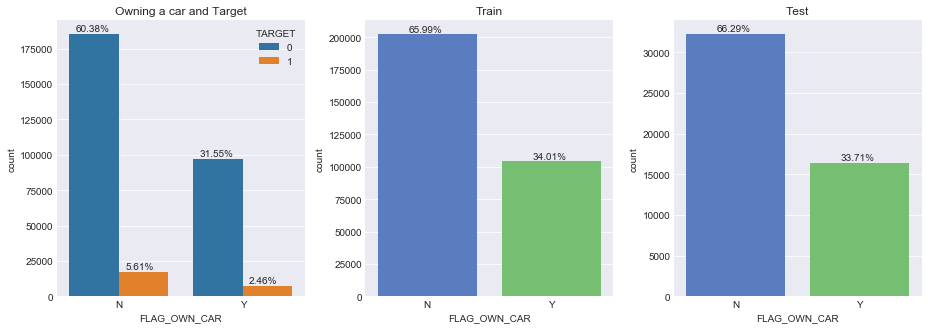

In [65]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,13))
plt.subplot(3,3,1)
plt.title("Owning a car and Target")
ax = sns.countplot(x="FLAG_OWN_CAR", hue="TARGET", data = application_train)
for p in ax.patches:
        ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_train)), (p.get_x()+0.05, p.get_height()+2000))
plt.tight_layout()
plt.subplot(3,3,2)
plt.title("Train")
ax = sns.countplot(x="FLAG_OWN_CAR", data=application_train, palette="muted")
for p in ax.patches:
        ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_train)), (p.get_x()+0.25, p.get_height()+1000))
plt.tight_layout()
plt.subplot(3,3,3)
plt.title("Test")
ax = sns.countplot(x="FLAG_OWN_CAR", data=application_test, palette="muted")
for p in ax.patches:
        ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_test)), (p.get_x()+0.25, p.get_height()+250)) 
plt.tight_layout()

In [243]:
car_train = pd.get_dummies(application_train[["FLAG_OWN_CAR","TARGET"]], prefix="OHE")
car_test = pd.get_dummies(application_test[["FLAG_OWN_CAR"]], prefix="OHE")
car_comparison = car_train.corr()["TARGET"].to_frame(name="Corr")
car_comparison["Train %"] = 100*car_train.sum()/len(car_train)
car_comparison["Test %"] = 100*car_test.sum()/len(car_test)
car_comparison["(Train - Test) %"] = car_comparison["Train %"] - car_comparison["Test %"]
car_comparison.sort_values(by="Corr")

,Corr,Train %,Test %,(Train - Test) %
OHE_Y,-0.021851,34.010816,33.712867,0.297949
OHE_N,0.021851,65.989184,66.287133,-0.297949
TARGET,1.000000,8.072882,NaN,NaN


Y means that a car is owned by the loanee. N means that a car is not owned by the loanee 

__Conclusions:__  Train and test set are identitcal. People without cars seem to default more often. 

## 14.2 __Age of Car:__ <a name ="AgeCar"></a>

How old is the car?

<Figure size 936x360 with 0 Axes>

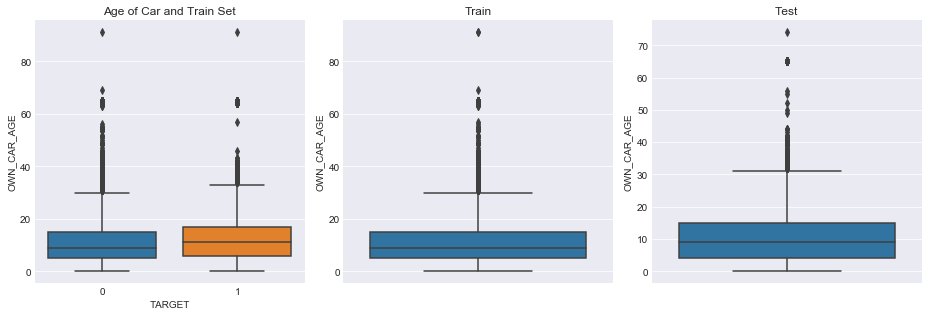

In [70]:
plt.figure(figsize=(13,5))
car_age_train = application_train[["OWN_CAR_AGE","TARGET"]]
car_age_test = application_test[["OWN_CAR_AGE"]]
sns.set_style("darkgrid")
plt.figure(figsize=(13,4.5))
plt.subplot(1,3,1)
plt.title("Age of Car and Train Set")
sns.boxplot(y="OWN_CAR_AGE", x="TARGET", data=age_train)
plt.tight_layout()
plt.subplot(1,3,2)
plt.title("Train")
sns.boxplot(y="OWN_CAR_AGE", data=age_train)
plt.tight_layout()
plt.subplot(1,3,3)
plt.title("Test")
sns.boxplot(y="OWN_CAR_AGE", data=age_test)
plt.tight_layout()

In [269]:
car_age_train = pd.get_dummies(application_train[["OWN_CAR_AGE","TARGET"]], prefix="OHE",columns=["OWN_CAR_AGE"],dummy_na=True)
car_age_test = pd.get_dummies(application_test[["OWN_CAR_AGE"]], prefix="OHE",columns=["OWN_CAR_AGE"],dummy_na=True)
car_age_comparison = car_age_train.corr()["TARGET"].to_frame(name="Corr")
car_age_comparison["Train %"] = 100*car_age_train.sum()/len(car_age_train)
car_age_comparison["Test %"] = 100*car_age_test.sum()/len(car_age_test)
car_age_comparison["(Train - Test) %"] = car_age_comparison["Train %"] - car_age_comparison["Test %"]
car_age_comparison[abs(car_age_comparison["Corr"]) >= 0.01]

,Corr,Train %,Test %,(Train - Test) %
TARGET,1.000000,8.072882,NaN,NaN
OHE_2.0,-0.010609,1.903021,2.010504,-0.107483
OHE_3.0,-0.016448,2.071471,2.106926,-0.035455
OHE_4.0,-0.013317,1.807090,2.773675,-0.966585
OHE_5.0,-0.011574,1.169064,1.700722,-0.531658
OHE_6.0,-0.013332,2.075373,1.021664,1.053709
OHE_7.0,-0.012936,2.414223,2.463893,-0.049670
OHE_nan,0.021841,65.990810,66.289184,-0.298374


__Conclusion__: Since there are so many levels I only decided to keep those with a correlation above abs(0.02). Nan were the only cases with such a case (people without cars). It looks like those without cars are more likely to default. Interestingly this correlation is the EXACT same as the correlation for not owning a car in the above section.

# 15. __Credit Rating__ <a name="CreditRating"></a>

Home Credit determines credit rating from external data sources.

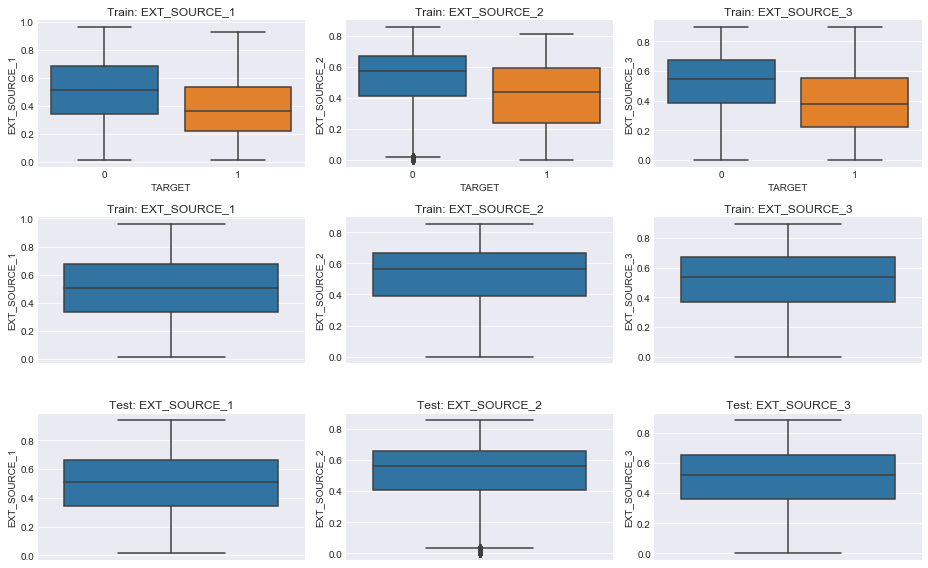

In [227]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,8))
plt.subplot(3,3,1)
plt.title("Train: EXT_SOURCE_1")
sns.boxplot(y="EXT_SOURCE_1", x="TARGET", data=application_train)
plt.tight_layout()
plt.subplot(3,3,2)
plt.title("Train: EXT_SOURCE_2")
sns.boxplot(y="EXT_SOURCE_2", x="TARGET", data=application_train)
plt.tight_layout()
plt.subplot(3,3,3)
plt.title("Train: EXT_SOURCE_3")
sns.boxplot(y="EXT_SOURCE_3", x="TARGET", data=application_train)
plt.tight_layout()
#--
plt.subplot(3,3,4)
plt.title("Train: EXT_SOURCE_1")
sns.boxplot(y="EXT_SOURCE_1", data=application_train)
plt.tight_layout()
plt.subplot(3,3,5)
plt.title("Train: EXT_SOURCE_2")
sns.boxplot(y="EXT_SOURCE_2", data=application_train)
plt.tight_layout()
plt.subplot(3,3,6)
plt.title("Train: EXT_SOURCE_3")
sns.boxplot(y="EXT_SOURCE_3", data=application_train)
plt.tight_layout()
#--
plt.subplot(3,3,7)
plt.title("Test: EXT_SOURCE_1")
sns.boxplot(y="EXT_SOURCE_1", data=application_test)
plt.tight_layout()
plt.subplot(3,3,8)
plt.title("Test: EXT_SOURCE_2")
sns.boxplot(y="EXT_SOURCE_2", data=application_test)
plt.tight_layout()
plt.subplot(3,3,9)
plt.title("Test: EXT_SOURCE_3")
sns.boxplot(y="EXT_SOURCE_3", data=application_test)
plt.tight_layout()

In [244]:
credit_rating_train = application_train[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
credit_rating_comparison = credit_rating_train.corr()["TARGET"].to_frame(name="Corr")
credit_rating_comparison.sort_values(by="Corr")

,Corr
EXT_SOURCE_3,-0.178919
EXT_SOURCE_2,-0.160472
EXT_SOURCE_1,-0.155317
TARGET,1.000000


Wow these are the best values we have created so far. Lets try to combine them and test the correlation.

# 16. __Social Surrounding__ <a name="Social"></a>

What can we learn from the applicant's social surroundings?

In [245]:
ss_train = application_train[["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","TARGET"]]
ss_test = application_test[["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]]
ss_comparison = ss_train.corr()["TARGET"].to_frame(name="Corr")
ss_comparison["Mean(Train)"] = ss_train.sum()/len(ss_train)
ss_comparison["Mean(Test)"] = ss_test.sum()/len(ss_test)
ss_comparison["Mean(Train)- Mean(Test)"] = ss_comparison["Mean(Train)"] - ss_comparison["Mean(Test)"]
ss_comparison.sort_values(by="Corr")

,Corr,Mean(Train),Mean(Test),Mean(Train)- Mean(Test)
OBS_60_CNT_SOCIAL_CIRCLE,0.009022,1.400626,1.434884,-0.034258
OBS_30_CNT_SOCIAL_CIRCLE,0.009131,1.417523,1.446783,-0.029260
DEF_60_CNT_SOCIAL_CIRCLE,0.031276,0.099717,0.101079,-0.001362
DEF_30_CNT_SOCIAL_CIRCLE,0.032248,0.142944,0.143566,-0.000622
TARGET,1.000000,0.080729,NaN,NaN


OBS: stands for observation, also "is it time for?"
DEF: stands for actual default
    
Here each variable is determine the number of people in the applicant's social circle who have either defaulted or are eligible to be defaulted on where their payment was due in the 30 or 60 days.

__Conclusion__: Applicants who actually have people default in their social circle tend to default more often, albeit at a small correlation. Train and test set are similar.

# 17. __Enquiries to Credit Bureau__ <a name="EnqBureau"></a>

How many times has the client been enquiried about at the credit bureau in the last hour, day, week, month, quarter or year?

In [246]:
enq_train = application_train[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',"TARGET"]]
enq_test = application_test[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]
enq_comparison = enq_train.corr()["TARGET"].to_frame(name="Corr")
enq_comparison["Mean(Train)"] = enq_train.sum()/len(enq_train)
enq_comparison["Mean(Test)"] = enq_test.sum()/len(enq_test)
enq_comparison["Mean(Train)- Mean(Test)"] = enq_comparison["Mean(Train)"] - enq_comparison["Mean(Test)"]
enq_comparison.sort_values(by="Corr")

,Corr,Mean(Train),Mean(Test),Mean(Train)- Mean(Test)
AMT_REQ_CREDIT_BUREAU_MON,-0.012462,0.231293,0.008145,0.223148
AMT_REQ_CREDIT_BUREAU_QRT,-0.002022,0.229631,0.479033,-0.249403
AMT_REQ_CREDIT_BUREAU_WEEK,0.000788,0.029723,0.002441,0.027281
AMT_REQ_CREDIT_BUREAU_HOUR,0.000930,0.005538,0.001846,0.003692
AMT_REQ_CREDIT_BUREAU_DAY,0.002704,0.006055,0.001580,0.004475
AMT_REQ_CREDIT_BUREAU_YEAR,0.019930,1.643447,1.737588,-0.094141
TARGET,1.000000,0.080729,NaN,NaN


__Conclusion__: The number of enquiries seems to not have a correlative effect that is noticeable. The yearly mark seems to be the only one with a noticeable effect.

# 18. __Documents Provided__ <a name="Documents"></a>

What documents has the applicant provided? Here we investigate a set of 20 unknown documents to see if there is any effect.

In [275]:
doc_train = application_train[['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',"TARGET"]]
doc_test = application_test[['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']]
doc_train["SUM"] = doc_train['FLAG_DOCUMENT_2']+doc_train['FLAG_DOCUMENT_3']+doc_train['FLAG_DOCUMENT_4']+doc_train['FLAG_DOCUMENT_5']+doc_train['FLAG_DOCUMENT_6']+doc_train['FLAG_DOCUMENT_7']+doc_train['FLAG_DOCUMENT_8']+doc_train['FLAG_DOCUMENT_9']+doc_train['FLAG_DOCUMENT_10']+doc_train['FLAG_DOCUMENT_11']+doc_train['FLAG_DOCUMENT_12']+doc_train['FLAG_DOCUMENT_13']+doc_train['FLAG_DOCUMENT_14']+doc_train['FLAG_DOCUMENT_15']+doc_train['FLAG_DOCUMENT_16']+doc_train['FLAG_DOCUMENT_17']+doc_train['FLAG_DOCUMENT_18']+doc_train['FLAG_DOCUMENT_19']+doc_train['FLAG_DOCUMENT_20']+doc_train['FLAG_DOCUMENT_21']
doc_comparison = doc_train.corr()["TARGET"].to_frame(name="Corr")
doc_comparison["Train % == 1"] = 100*doc_train.sum()/len(doc_train)
doc_comparison["Test % == 1"] = 100*doc_test.sum()/len(doc_test)
doc_comparison["(Train - Test) %"] = doc_comparison["Train % == 1"] - doc_comparison["Test % == 1"]
doc_comparison[abs(doc_comparison["Corr"]) >= 0.01].sort_values(by="Corr")

C:\Users\Pavle\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Corr,Train % == 1,Test % == 1,(Train - Test) %
FLAG_DOCUMENT_6,-0.028602,8.805539,8.747743,0.057795
FLAG_DOCUMENT_16,-0.011615,0.992810,0.000000,0.992810
FLAG_DOCUMENT_13,-0.011583,0.352508,0.000000,0.352508
SUM,0.017193,93.015534,NaN,NaN
FLAG_DOCUMENT_3,0.044346,71.002338,78.661989,-7.659651
TARGET,1.000000,8.072882,NaN,NaN


__Conclusion__: The number of documents provided seems to have little effect in general. Providing document 3 is the most important. Document 3 seems to more represented in Test than Train by about 7.65%. Document 16 and 13 should not be used to create predictions on the test set since they are minimally represented.

# 19. __Time of Application__ <a name="Application"></a>

Information about the applicant at the time of application:

## 19.1 __Accompanied:__ <a name ="Accompanied"></a>

Person or people who accompanied loanee at the time of application.

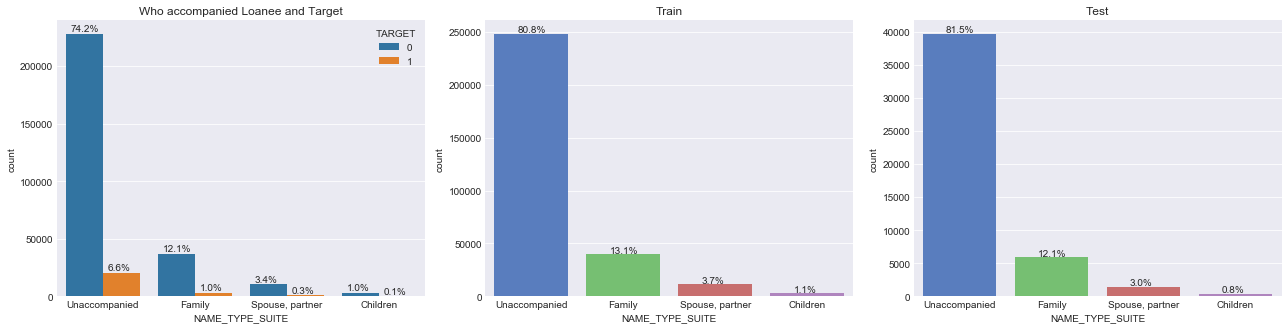

In [207]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,13))
plt.subplot(3,3,1)
plt.title("Who accompanied Loanee and Target")
ax = sns.countplot(x="NAME_TYPE_SUITE", hue="TARGET", data = application_train, order=['Unaccompanied','Family','Spouse, partner', 'Children'])
for p in ax.patches:
        ax.annotate("{0:.01f}%".format(100*p.get_height()/len(application_train)), (p.get_x()+0.05, p.get_height()+2000))
plt.tight_layout()
plt.subplot(3,3,2)
plt.title("Train")
ax = sns.countplot(x="NAME_TYPE_SUITE", data=application_train, palette="muted", order=['Unaccompanied','Family','Spouse, partner', 'Children'])
for p in ax.patches:
        ax.annotate("{0:.01f}%".format(100*p.get_height()/len(application_train)), (p.get_x()+0.25, p.get_height()+1000))
plt.tight_layout()
plt.subplot(3,3,3)
plt.title("Test")
ax = sns.countplot(x="NAME_TYPE_SUITE", data=application_test, palette="muted", order=['Unaccompanied','Family','Spouse, partner', 'Children'])
for p in ax.patches:
        ax.annotate("{0:.01f}%".format(100*p.get_height()/len(application_test)), (p.get_x()+0.25, p.get_height()+250)) 
plt.tight_layout()

In [209]:
accompany_train = pd.get_dummies(application_train[["NAME_TYPE_SUITE","TARGET"]], prefix="OHE")
accompany_test = pd.get_dummies(application_test[["NAME_TYPE_SUITE"]], prefix="OHE")
accompany_comparison = accompany_train.corr()["TARGET"].to_frame(name="Corr")
accompany_comparison["Train %"] = 100*accompany_train.sum()/len(accompany_train)
accompany_comparison["Test %"] = 100*accompany_test.sum()/len(accompany_test)
accompany_comparison["(Train - Test) %"] = accompany_comparison["Train %"] - accompany_comparison["Test %"]
accompany_comparison.sort_values(by="Corr")

,Corr,Train %,Test %,(Train - Test) %
OHE_Family,-0.008226,13.056118,12.065075,0.991044
OHE_Children,-0.002648,1.062401,0.837026,0.225375
"OHE_Spouse, partner",-0.001448,3.697429,2.970622,0.726807
OHE_Group of people,0.000452,0.088127,0.100525,-0.012398
OHE_Other_A,0.001372,0.281616,0.223617,0.057999
OHE_Other_B,0.004909,0.575589,0.432874,0.142715
OHE_Unaccompanied,0.008301,80.818572,81.501313,-0.682741
TARGET,1.000000,8.072882,NaN,NaN


Only visualized 4 categories that make up for ~98% of the data. 

__Conclusion__: Train and test are identical. There seems to be no correlation here. This column could be removed.

## 19.2 __Time of Application__: <a name="TimeApp"></a>

What day and what hour did the applicant apply at?

In [277]:
hour_train = pd.get_dummies(application_train[["HOUR_APPR_PROCESS_START","TARGET"]], prefix="OHE", columns=["HOUR_APPR_PROCESS_START"])
hour_test = pd.get_dummies(application_test[["HOUR_APPR_PROCESS_START"]], prefix="OHE", columns=["HOUR_APPR_PROCESS_START"])
hour_comparison = hour_train.corr()["TARGET"].to_frame(name="Corr")
hour_comparison["Train %"] = 100*hour_train.sum()/len(hour_train)
hour_comparison["Test %"] = 100*hour_test.sum()/len(hour_test)
hour_comparison["(Train - Test) %"] = hour_comparison["Train %"] - hour_comparison["Test %"]
hour_comparison[abs(hour_comparison["Corr"]) >= 0.01].sort_values(by="Corr")

,Corr,Train %,Test %,(Train - Test) %
OHE_17,-0.013112,4.845355,4.833415,0.011940
OHE_5,0.010081,1.183047,1.136550,0.046497
OHE_7,0.012649,2.969325,2.679304,0.290021
OHE_6,0.015161,1.899769,2.078204,-0.178435
TARGET,1.000000,8.072882,NaN,NaN


__Conclusion__: Those who apply near the end of the workday are less likely to default (17). Those who apply super early in the morning are more likely to default (5,6,7). Overall an relatively unimportant variate.

In [211]:
week_train = pd.get_dummies(application_train[["WEEKDAY_APPR_PROCESS_START","TARGET"]], prefix="OHE", columns=["WEEKDAY_APPR_PROCESS_START"])
week_test = pd.get_dummies(application_test[["WEEKDAY_APPR_PROCESS_START"]], prefix="OHE", columns=["WEEKDAY_APPR_PROCESS_START"])
week_comparison = week_train.corr()["TARGET"].to_frame(name="Corr")
week_comparison["Train %"] = 100*week_train.sum()/len(week_train)
week_comparison["Test %"] = 100*week_test.sum()/len(week_test)
week_comparison["(Train - Test) %"] = week_comparison["Train %"] - week_comparison["Test %"]
week_comparison.sort_values(by="Corr")

,Corr,Train %,Test %,(Train - Test) %
OHE_MONDAY,-0.005149,16.491768,17.245199,-0.753432
OHE_SATURDAY,-0.002396,11.008387,9.443214,1.565173
OHE_SUNDAY,-0.001244,5.261926,3.813803,1.448123
OHE_THURSDAY,0.000446,16.451769,17.269818,-0.818049
OHE_FRIDAY,0.001203,16.369496,14.873625,1.495870
OHE_WEDNESDAY,0.001447,16.888502,17.349828,-0.461326
OHE_TUESDAY,0.004698,17.528153,20.004513,-2.476360
TARGET,1.000000,8.072882,NaN,NaN


__Conclusion__: No correlation of interest here. Train and test set are similar.

## 19.3 __Change of Information__ <a name="ChangeInfo"></a>

How many days prior to application did the client change their registration or identity documents?

In [220]:
change_info_train = application_train[["DAYS_ID_PUBLISH","DAYS_REGISTRATION","DAYS_LAST_PHONE_CHANGE","TARGET"]]
change_info_comparison = change_info_train.corr()["TARGET"].to_frame(name="Corr")
change_info_comparison.sort_values(by="Corr")

,Corr
DAYS_REGISTRATION,0.041975
DAYS_ID_PUBLISH,0.051457
DAYS_LAST_PHONE_CHANGE,0.055218
TARGET,1.000000


__Conclusion__: Some of the weirdest data turns out to create useful predictors. Looks like the number of days since the applicant has changed their registration or an identity document.

## 20. __Contact Information:__ <a name ="ContactInfo"></a>

Did the applicant provide us with their contact information? What about their address? 

In [221]:
contact_info_train = application_train[["FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL",'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY',"TARGET"]]
contact_info_test = application_test[["FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL",'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY']]
contact_info_train["SUM_contact"] = contact_info_train["FLAG_MOBIL"]+contact_info_train["FLAG_EMP_PHONE"]+contact_info_train["FLAG_WORK_PHONE"]+contact_info_train["FLAG_CONT_MOBILE"]+contact_info_train["FLAG_PHONE"]+contact_info_train["FLAG_EMAIL"]
contact_info_comparison = contact_info_train.corr()["TARGET"].to_frame(name="Corr")
contact_info_comparison["Train % == 1"] = 100*contact_info_train.sum()/len(contact_info_train)
contact_info_comparison["Test % == 1"] = 100*contact_info_test.sum()/len(contact_info_test)
contact_info_comparison["(Train - Test) %"] = contact_info_comparison["Train % == 1"] - contact_info_comparison["Test % == 1"]
contact_info_comparison.sort_values(by="Corr")

C:\Users\Pavle\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Corr,Train % == 1,Test % == 1,(Train - Test) %
FLAG_PHONE,-0.023806,28.106637,26.312982,1.793655
FLAG_EMAIL,-0.001758,5.671992,16.264566,-10.592574
FLAG_CONT_MOBILE,0.000370,99.813340,99.839980,-0.026640
FLAG_MOBIL,0.000534,99.999675,99.997948,0.001726
LIVE_REGION_NOT_WORK_REGION,0.002819,4.065871,4.203594,-0.137723
REG_REGION_NOT_LIVE_REGION,0.005576,1.514417,1.883309,-0.368891
REG_REGION_NOT_WORK_REGION,0.006942,5.076892,5.516576,-0.439685
SUM_contact,0.020774,335.517429,NaN,NaN
FLAG_WORK_PHONE,0.028524,19.936848,20.470212,-0.533364
LIVE_CITY_NOT_WORK_CITY,0.032518,17.955455,17.421631,0.533824


REG_CITY_NOT_WORK_CITY: Flag if client's permanent address does not match work address (1=different, 0=same, at city level)
FLAG_EMP_PHONE: Did client provide work phone (1=YES, 0=NO)
REG_CITY_NOT_LIVE_CITY: Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)
LIVE_CITY_NOT_WORK_CITY: Flag if client's contact address does not match work address (1=different, 0=same, at city level)

__Conclusion__: Here we find other exploitable relationships. Test set seems to feature many more clients providing emails.

# 21. __Previous Applications__ <a name="PrevApp"></a>

What can we learn from previous applications?

In [33]:
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

## 21.1 How is this related to our sample? <a name="Relation"></a>

__Important:__ Loans in our sample can have 0 or more previous loan applications.

We can determine how many loans in our sample is in the set of previous loan applications.

In [39]:
prev_SK_ID_CURR = previous_application["SK_ID_CURR"]
train_SK_ID_CURR = application_train["SK_ID_CURR"]
test_SK_ID_CURR = application_test["SK_ID_CURR"]
print("Number of loans in our sample that is in set of previous applications: ",len(list(set(prev_SK_ID_CURR).intersection(train_SK_ID_CURR)))+len(list(set(prev_SK_ID_CURR).intersection(test_SK_ID_CURR))))

Number of loans in our sample that is in set of previous applications:  338857


__SK_ID_CURR__: the sample this previous application corresponds to in application_test/application_train

__SK_ID_PREV__: is the unique row identifier for this table 

## 21.2 Contract Status <a name="ContractStatus"></a>

We have 4 possible statuses that can be linked to a previous application: approved, refused, canceled and ununsed offer.

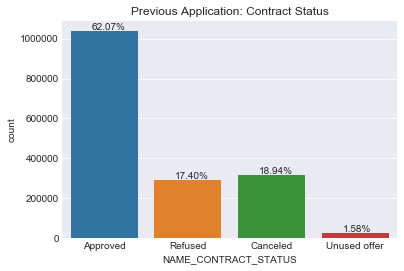

In [44]:
sns.set_style("darkgrid")
ax = sns.countplot(x="NAME_CONTRACT_STATUS", data=previous_application)
plt.title("Previous Application: Contract Status")
for p in ax.patches:
        ax.annotate("{0:.02f}%".format(100*p.get_height()/len(previous_application)), (p.get_x()+0.25, p.get_height()+8000))

## 21.3 __Loan Type:__ <a name="PrevLoanType"></a>

What type of loan is involved?

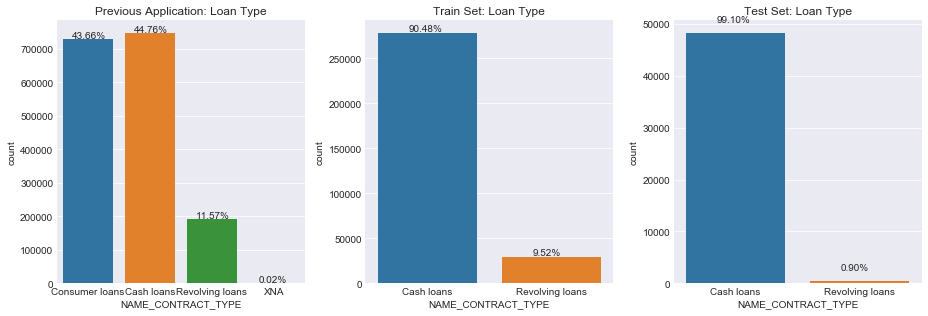

In [47]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,4.5))
plt.subplot(1,3,1)
plt.title("Previous Application: Loan Type")
ax = sns.countplot(x="NAME_CONTRACT_TYPE", data = previous_application)
for p in ax.patches:
        ax.annotate("{0:.02f}%".format(100*p.get_height()/len(previous_application)), (p.get_x()+0.15, p.get_height()+2000))
plt.tight_layout()
plt.subplot(1,3,2)
plt.title("Train Set: Loan Type")
ax = sns.countplot(x="NAME_CONTRACT_TYPE",  data = application_train)
for p in ax.patches:
        ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_train)), (p.get_x()+0.25, p.get_height()+2000))
plt.tight_layout()
plt.subplot(1,3,3)
plt.title("Test Set: Loan Type")
ax = sns.countplot(x="NAME_CONTRACT_TYPE", data = application_test)
for p in ax.patches:
        ax.annotate("{0:.02f}%".format(100*p.get_height()/len(application_test)), (p.get_x()+0.25, p.get_height()+2000))
plt.tight_layout()

__Conclusion__: The previous application set includes consumer loans and unknown (XNA) loans. The unknown loans should probably be removed to maintain homogenity. Consumer loans will be kept just because it represents a really large portion of the previous application set.

## 21.4 __Amount Values:__ <a name="AmountValues"></a>

What is the annuity, credit, down payment, goods price....

__Annuity__: Series of payments made at equal intervals.

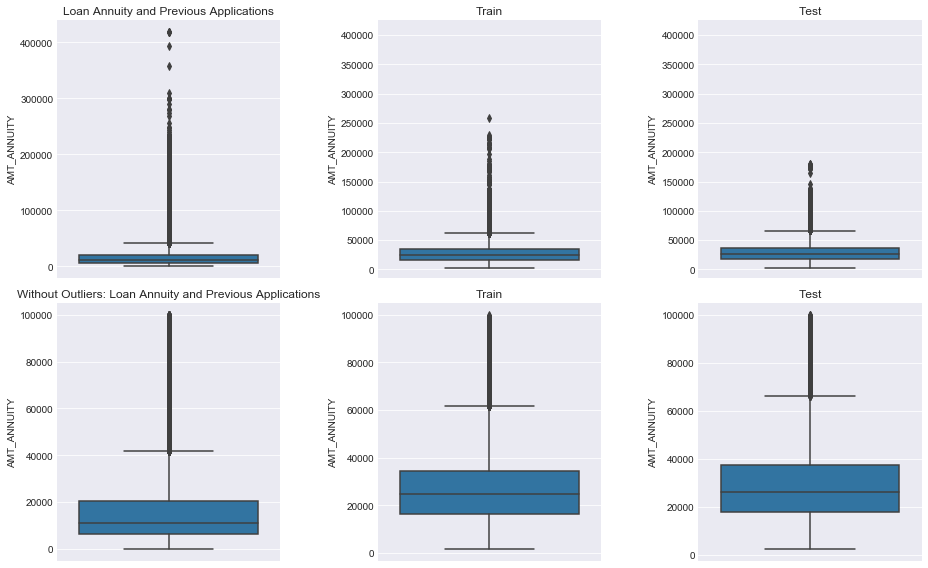

In [67]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,8))
plt.subplot(2,3,1)
plt.title("Loan Annuity and Previous Applications")
sns.boxplot(y="AMT_ANNUITY", data=previous_application)
plt.tight_layout()
plt.subplot(2,3,2)
plt.title("Train")
plt.ylim(-15000, 425000)
sns.boxplot(y="AMT_ANNUITY", data=application_train)
plt.tight_layout()
plt.subplot(2,3,3)
plt.title("Test")
plt.ylim(-15000, 425000)
sns.boxplot(y="AMT_ANNUITY", data=application_test)
plt.tight_layout()
# plots without outliers, determined arbitrarily
plt.subplot(2,3,4)
plt.title("Without Outliers: Loan Annuity and Previous Applications")
sns.boxplot(y="AMT_ANNUITY", data=previous_application[previous_application["AMT_ANNUITY"] < 100000])
plt.tight_layout()
plt.subplot(2,3,5)
plt.title("Train")
sns.boxplot(y="AMT_ANNUITY", data=application_train[application_train["AMT_ANNUITY"] < 100000])
plt.tight_layout()
plt.subplot(2,3,6)
plt.title("Test")
sns.boxplot(y="AMT_ANNUITY", data=application_test[application_test["AMT_ANNUITY"] < 100000])
plt.tight_layout()

__Conclusion__: Previous applications contain many more outliers (due to larger relative size). Boxplots are vastly different when not including outliers. Suggesting different distributions, the variance of the annuity amount in test and train are as noted before in agreement, but are much more varying previous applications.

__How much credit did the client ask on the previous application?__

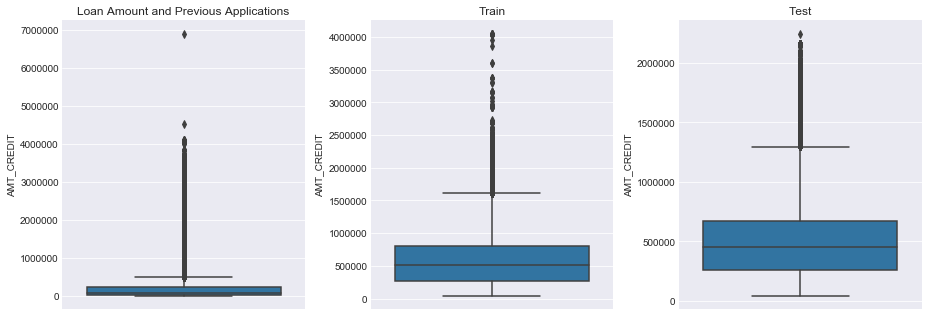

In [21]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,4.5))
plt.subplot(1,3,1)
plt.title("Loan Amount and Previous Applications")
sns.boxplot(y="AMT_CREDIT", data=previous_application)
plt.tight_layout()
plt.subplot(1,3,2)
plt.title("Train")
sns.boxplot(y="AMT_CREDIT", data=application_train)
plt.tight_layout()
plt.subplot(1,3,3)
plt.title("Test")
sns.boxplot(y="AMT_CREDIT", data=application_test)
plt.tight_layout()

__What is the down payment on the previous application?__

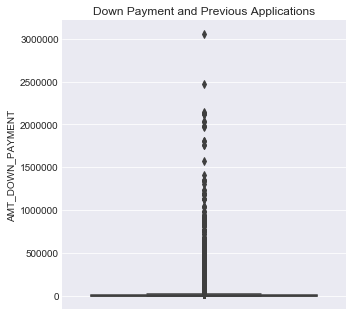

In [24]:
sns.set_style("darkgrid")
plt.figure(figsize=(5,4.5))
plt.title("Down Payment and Previous Applications")
sns.boxplot(y="AMT_DOWN_PAYMENT", data=previous_application)
plt.tight_layout()

__What is the price of the good the client asked for on the previous application?__

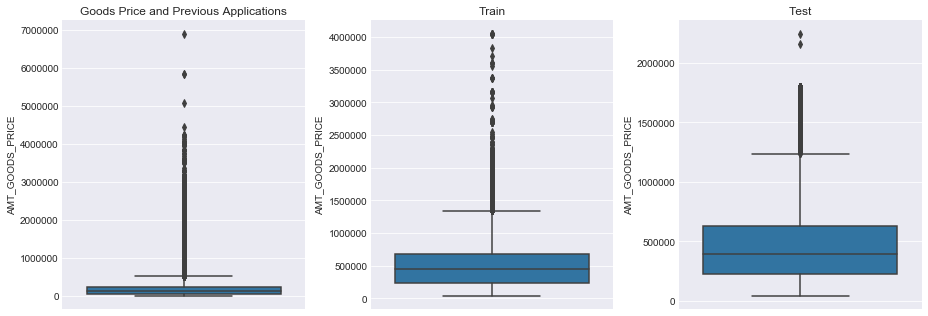

In [61]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,4.5))
plt.subplot(1,3,1)
plt.title("Goods Price and Previous Applications")
sns.boxplot(y="AMT_GOODS_PRICE", data=previous_application)
plt.tight_layout()
plt.subplot(1,3,2)
plt.title("Train")
sns.boxplot(y="AMT_GOODS_PRICE", data=application_train)
plt.tight_layout()
plt.subplot(1,3,3)
plt.title("Test")
sns.boxplot(y="AMT_GOODS_PRICE", data=application_test)
plt.tight_layout()

## 21.5 __Rates:__ <a name="Rates"></a>

What is the down payment rate, primary interest rate, privileged interest rate

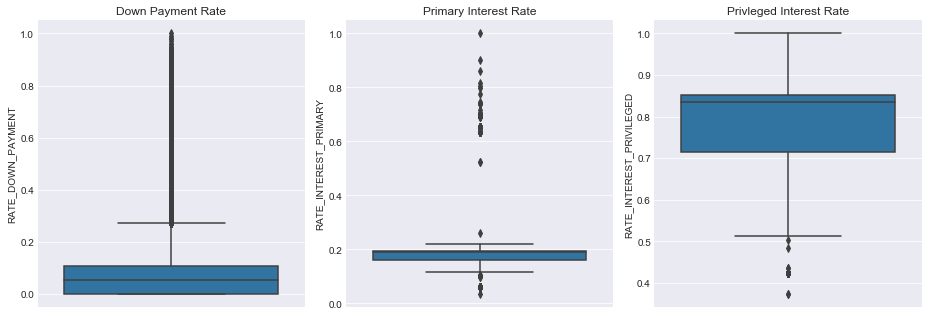

In [20]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,4.5))
plt.subplot(1,3,1)
plt.title("Down Payment Rate")
sns.boxplot(y="RATE_DOWN_PAYMENT", data=previous_application)
plt.tight_layout()
plt.subplot(1,3,2)
plt.title("Primary Interest Rate")
sns.boxplot(y="RATE_INTEREST_PRIMARY", data=previous_application)
plt.tight_layout()
plt.subplot(1,3,3)
plt.title("Privleged Interest Rate")
sns.boxplot(y="RATE_INTEREST_PRIVILEGED", data=previous_application)
plt.tight_layout()

## 21.6 __Why does the applicant need the loan?:__ <a name="Why"></a>

What is the reason for the loan?

In [36]:
previous_application.groupby('NAME_CASH_LOAN_PURPOSE').count()['SK_ID_CURR'].sort_values()

NAME_CASH_LOAN_PURPOSE
Refusal to name the goal                15
Money for a third person                25
Hobby                                   55
Buying a garage                        136
Gasification / water supply            300
Business development                   426
Buying a holiday home / land           533
Furniture                              749
Car repairs                            797
Buying a home                          865
Wedding / gift / holiday               962
Buying a new car                      1012
Purchase of electronic equipment      1061
Journey                               1239
Education                             1573
Payments on other loans               1931
Medicine                              2174
Everyday expenses                     2416
Building a house or an annex          2693
Buying a used car                     2888
Urgent needs                          8412
Other                                15608
Repairs                        

## 21.7 __What was the reason for the rejection?:__ <a name="Reject"></a>

What is the reason for the rejection of the loan?

In [37]:
previous_application.groupby('CODE_REJECT_REASON').count()['SK_ID_CURR'].sort_values()

CODE_REJECT_REASON
SYSTEM        717
VERIF        3535
XNA          5244
SCOFR       12811
CLIENT      26436
SCO         37467
LIMIT       55680
HC         175231
XAP       1353093
Name: SK_ID_CURR, dtype: int64

# Summary <a name="summary"></a>

We have completed an indepth EDA on the data in this kaggle competition. Hopefully these insights can provide useful features for the training of a model.